# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past few years and is now larger than the new car market. Cars4U is a budding tech start-up that aims to find footholes in this market. In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), the used car market is a very different beast, with large uncertainties in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can influence the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### **The objective:**

Come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

### **The key questions:**

- What are the most important variables/features for predicting the price of a used car.

### **The problem formulation**:

- We want to efficienctly know what will keep the prices highest on return value for the vehicle.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# set some defaults
sns.set_style('darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

pd.set_option('display.width', 250)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### **Let us load the data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/mit-pe/capstone/used_cars.csv')
full_data = data.copy()

In [4]:
# renaming columns for ease of use
data.columns = [x.lower() for x in data.columns]
data = data.rename(columns={'s.no.': 'serno', 'kilometers_driven': 'km'})
data.head()


,serno,name,location,year,km,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [5]:
data.shape

(7253, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   serno         7253 non-null   int64  
 1   name          7253 non-null   object 
 2   location      7253 non-null   object 
 3   year          7253 non-null   int64  
 4   km            7253 non-null   int64  
 5   fuel_type     7253 non-null   object 
 6   transmission  7253 non-null   object 
 7   owner_type    7253 non-null   object 
 8   mileage       7251 non-null   float64
 9   engine        7207 non-null   float64
 10  power         7078 non-null   float64
 11  seats         7200 non-null   float64
 12  new_price     1006 non-null   float64
 13  price         6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [7]:
feature_lookup={
  'serno' : 'Serial Number',
  'name' : 'Name of the car which includes Brand name and Model name',
  'location' : 'The location in which the car is being sold or is available for purchase (Cities)',
  'year' : 'Manufacturing year of the car',
  'age' : 'How many years since manufacturing (assuming current 2020)',
  'km' : 'The total kilometers driven in the car by the previous owner(s) in KM',
  'fuel_type' : 'The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)',
  'transmission' : 'The type of transmission used by the car (Automatic / Manual)',
  'owner' : 'Type of ownership',
  'mileage' : 'The standard mileage offered by the car company in kmpl or km/kg',
  'engine' : 'The displacement volume of the engine in CC',
  'power' : 'The maximum power of the engine in bhp',
  'seats' : 'The number of seats in the car',
  'new_price' : 'The price of a new car of the same model in INR 100,000',
  'price' : 'The price of the used car in INR 100,000 (Target Variable)',
}

## Data Overview

- Observations
- Sanity checks

In [8]:
data.isnull().sum()

serno              0
name               0
location           0
year               0
km                 0
fuel_type          0
transmission       0
owner_type         0
mileage            2
engine            46
power            175
seats             53
new_price       6247
price           1234
dtype: int64

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

- *I will be cleaning and doing EDA in conjunction with Uni/Bi/Multi Variate analysis*

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
serno,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
km,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
new_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


In [10]:
data.nunique()

serno           7253
name            2041
location          11
year              23
km              3660
fuel_type          5
transmission       2
owner_type         4
mileage          438
engine           150
power            383
seats              8
new_price        625
price           1373
dtype: int64

In [11]:
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['name', 'location', 'fuel_type', 'transmission', 'owner_type'], dtype='object')

In [12]:
data.name.nunique()

2041

In [13]:
data.name.value_counts()

name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64

In [14]:
counts = data['name'].value_counts()
counts[counts == 1].sum()

862

2041 unique combinations of brand and model name. The XUV500 is the most popular. The singular data points may be troublesome. 862 of data points are singular.

In [15]:
for col in cat_cols:
  print('{} - {}'.format(col,data[col].unique()))


name - ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
location - ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
fuel_type - ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
transmission - ['Manual' 'Automatic']
owner_type - ['First' 'Second' 'Fourth & Above' 'Third']


We will be one hot encoding a lot of these items. owner_type is ordinal, so it may be wise to change it to 1, 2, 3, and 4. We will investigate further.

In [16]:
num_cols = data.select_dtypes(include=np.number).columns
num_cols

Index(['serno', 'year', 'km', 'mileage', 'engine', 'power', 'seats', 'new_price', 'price'], dtype='object')

Serno is not meaningful.

In [17]:
data = data.drop(['serno'], axis=1)
num_cols = data.select_dtypes(include=np.number).columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7253 non-null   object 
 1   location      7253 non-null   object 
 2   year          7253 non-null   int64  
 3   km            7253 non-null   int64  
 4   fuel_type     7253 non-null   object 
 5   transmission  7253 non-null   object 
 6   owner_type    7253 non-null   object 
 7   mileage       7251 non-null   float64
 8   engine        7207 non-null   float64
 9   power         7078 non-null   float64
 10  seats         7200 non-null   float64
 11  new_price     1006 non-null   float64
 12  price         6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


Year needs to be cleaned, maybe into something more useful like how many years old the car is.

In [18]:
# Attempting to find the year the dataset is from
data.year.sort_values()

6216    1996
3749    1998
3138    1998
5716    1998
4709    1998
        ... 
5737    2019
599     2019
5434    2019
3132    2019
1361    2019
Name: year, Length: 7253, dtype: int64

In [19]:
# My original thought was to use 2019. But all USED cars have a little bit of age and the data has to be somewhat older than instaneous
data['age'] = 2020 - data.year
data = data.drop(['year'], axis=1)

kilometers_driven has some extreme numbers on the high end

In [20]:
data.sort_values(['km'], ascending=False)

,name,location,km,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,age
2328,BMW X5 xDrive 30d M Sport,Chennai,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00,3
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50,7
1860,Volkswagen Vento Diesel Highline,Chennai,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90,7
358,Hyundai i10 Magna 1.2,Chennai,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70,11
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,1000,Petrol,Manual,First,17.19,1197.0,81.86,5.0,10.25,8.60,1
1598,Tata Xenon XT EX 4X2,Jaipur,1000,Diesel,Manual,First,13.49,2179.0,138.03,5.0,NaN,7.50,3
1242,Jaguar XE 2.0L Diesel Prestige,Delhi,1000,Diesel,Automatic,First,13.60,1999.0,177.00,5.0,52.77,40.00,2
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,600,Petrol,Automatic,First,21.50,1197.0,81.80,5.0,6.80,6.25,1


It is reasonable, although extreme, to drive a vehicle 775000km in 6 years, 6.5million is not in 2 years.  Lets replace it with the median of vehicles of the same age.

In [21]:
m = data.query('age == 2 and index != 2823').km.median()
data.loc[2328, 'km'] = m
data.loc[2328]

name            BMW X5 xDrive 30d M Sport
location                          Chennai
km                                  22000
fuel_type                          Diesel
transmission                    Automatic
owner_type                          First
mileage                             15.97
engine                             2993.0
power                               258.0
seats                                 5.0
new_price                             NaN
price                                65.0
age                                     3
Name: 2328, dtype: object

In [22]:
data.mileage.describe()

count    7251.000000
mean       18.141580
std         4.562197
min         0.000000
25%        15.170000
50%        18.160000
75%        21.100000
max        33.540000
Name: mileage, dtype: float64

Mileage having a minimun of 0 doesnt make sense. 'The standard mileage offered by the car company in kmpl or km/kg'

kmpl and km/kg are somewhat close. 1 liter of fuel is about 0.74 kg. This metric is going to be tough to tie down which way. Its still a 25% difference between the two.

In [23]:
data.query('mileage > 0 and mileage < 10').describe().T

,count,mean,std,min,25%,50%,75%,max
km,52.0,53766.076923,31840.520111,5900.00,33000.0000,50700.50,71500.00,155566.0
mileage,52.0,8.949231,0.745861,6.40,8.4875,9.00,9.52,9.9
engine,52.0,3102.884615,1093.715625,1984.00,2261.5000,2983.00,3451.50,5998.0
power,47.0,271.220851,111.147690,118.60,193.1000,224.34,321.00,560.0
seats,52.0,4.461538,1.128274,2.00,4.0000,5.00,5.00,7.0
new_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,44.0,26.016818,24.259859,2.65,8.8600,19.00,34.00,120.0
age,52.0,9.653846,2.813724,3.00,7.7500,10.00,12.00,15.0


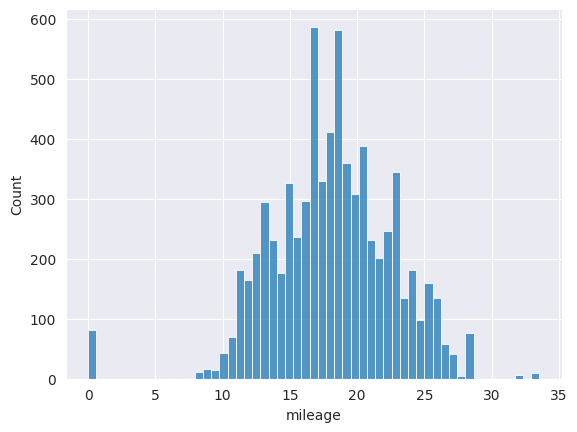

In [24]:
sns.histplot(data.mileage)
plt.show()

In [25]:
# get all the data points with mileage == 0
zero_mile = data[data.mileage == 0]
print(zero_mile.info())

# see if the mileage is filled in for any of these same vehicles
zero_mile_name = data[data.name.isin(zero_mile.name)]
zero_mile_name[zero_mile_name.mileage != 0]


<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 14 to 7226
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          81 non-null     object 
 1   location      81 non-null     object 
 2   km            81 non-null     int64  
 3   fuel_type     81 non-null     object 
 4   transmission  81 non-null     object 
 5   owner_type    81 non-null     object 
 6   mileage       81 non-null     float64
 7   engine        69 non-null     float64
 8   power         36 non-null     float64
 9   seats         67 non-null     float64
 10  new_price     4 non-null      float64
 11  price         68 non-null     float64
 12  age           81 non-null     int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 8.9+ KB
None


,name,location,km,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,age
3305,Honda City 1.5 GXI,Jaipur,75055,Petrol,Manual,First,12.8,1493.0,100.0,5.0,NaN,2.3,13
4767,Honda City 1.5 GXI,Mumbai,81000,Petrol,Manual,Second,12.8,1493.0,100.0,5.0,NaN,1.1,15


In [26]:
data[data.name == 'Honda City 1.5 GXI']

,name,location,km,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,age
194,Honda City 1.5 GXI,Ahmedabad,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95,13
1385,Honda City 1.5 GXI,Pune,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.50,16
3305,Honda City 1.5 GXI,Jaipur,75055,Petrol,Manual,First,12.8,1493.0,100.0,5.0,NaN,2.30,13
4767,Honda City 1.5 GXI,Mumbai,81000,Petrol,Manual,Second,12.8,1493.0,100.0,5.0,NaN,1.10,15
5270,Honda City 1.5 GXI,Bangalore,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85,18


In [27]:
# Spent too long on this
def fill_missing_values(data, index_col, fill_cols, include_zero=True):
    """
    Fills missing values in specified columns with median values
    based on one index columns. Optionally treats zeros as missing values.

    Parameters:
    - data: pd.DataFrame
    - index_col: str use as index for filling
    - fill_cols: str or list of str, column(s) where missing values are filled
    - include_zero: bool, if True, treats zeros as missing values

    Returns: missing values filled
    """
    if isinstance(index_col, list):
        index_col = index_col[0]

    if not isinstance(fill_cols, list):
        fill_cols = [fill_cols]

    # Create a copy of the data to avoid modifying the original dataframe
    df = data.copy()

    # go column by column looking for null (optionally zero) values
    for col in fill_cols:
      null_mask = df[col].isnull()
      if include_zero:
        null_mask = df[col].isnull() | (df[col] == 0)

      null_indexes = df[null_mask].name.unique()

      for null_index in null_indexes:
        # get all the rows with the same index
        index_mask = df[index_col] == null_index
        # check if any of the rows has a value for the col
        rows = df[index_mask & ~null_mask]
        if len(rows) > 0:
          #if it does, replace all the values with the median value
          med = rows[col].median()
          df.loc[df[index_col] == null_index , col] = med

    return df


print(data[data.name == 'Honda City 1.5 GXI'])
data = fill_missing_values(data, 'name', ['mileage', 'engine', 'power', 'seats'])
print(data[data.name == 'Honda City 1.5 GXI'])

                    name   location      km fuel_type transmission owner_type  mileage  engine  power  seats  new_price  price  age
194   Honda City 1.5 GXI  Ahmedabad   60006    Petrol       Manual      First      0.0     NaN    NaN    NaN        NaN   2.95   13
1385  Honda City 1.5 GXI       Pune  115000    Petrol       Manual     Second      0.0     NaN    NaN    NaN        NaN   1.50   16
3305  Honda City 1.5 GXI     Jaipur   75055    Petrol       Manual      First     12.8  1493.0  100.0    5.0        NaN   2.30   13
4767  Honda City 1.5 GXI     Mumbai   81000    Petrol       Manual     Second     12.8  1493.0  100.0    5.0        NaN   1.10   15
5270  Honda City 1.5 GXI  Bangalore   53000    Petrol       Manual     Second      0.0     NaN    NaN    NaN        NaN   1.85   18
                    name   location      km fuel_type transmission owner_type  mileage  engine  power  seats  new_price  price  age
194   Honda City 1.5 GXI  Ahmedabad   60006    Petrol       Manual      Firs

In [28]:
data[data.mileage == 0].fuel_type.value_counts()

fuel_type
Petrol    47
Diesel    31
Name: count, dtype: int64

My line of thinking here, is to use median mileage for the petrol and diesel to fill in the missing mileage. More in bivariate analysis.

In [29]:
zero_mask = data.mileage == 0
data[data.mileage != 0.0].groupby('fuel_type').mileage.describe().T

fuel_type,CNG,Diesel,Electric,LPG,Petrol
count,62.000000,3821.000000,0.0,12.000000,3278.000000
mean,25.445645,18.784781,NaN,18.695833,17.695049
std,6.278968,4.657876,NaN,5.166125,3.183138
min,11.880000,7.500000,NaN,13.200000,6.400000
25%,22.100000,14.940000,NaN,13.450000,15.900000
50%,26.600000,19.010000,NaN,17.300000,17.920000
75%,31.457500,22.690000,NaN,22.375000,19.400000
max,33.540000,28.400000,NaN,26.200000,26.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7253 non-null   object 
 1   location      7253 non-null   object 
 2   km            7253 non-null   int64  
 3   fuel_type     7253 non-null   object 
 4   transmission  7253 non-null   object 
 5   owner_type    7253 non-null   object 
 6   mileage       7251 non-null   float64
 7   engine        7213 non-null   float64
 8   power         7117 non-null   float64
 9   seats         7207 non-null   float64
 10  new_price     1006 non-null   float64
 11  price         6019 non-null   float64
 12  age           7253 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

### Numerical Variables

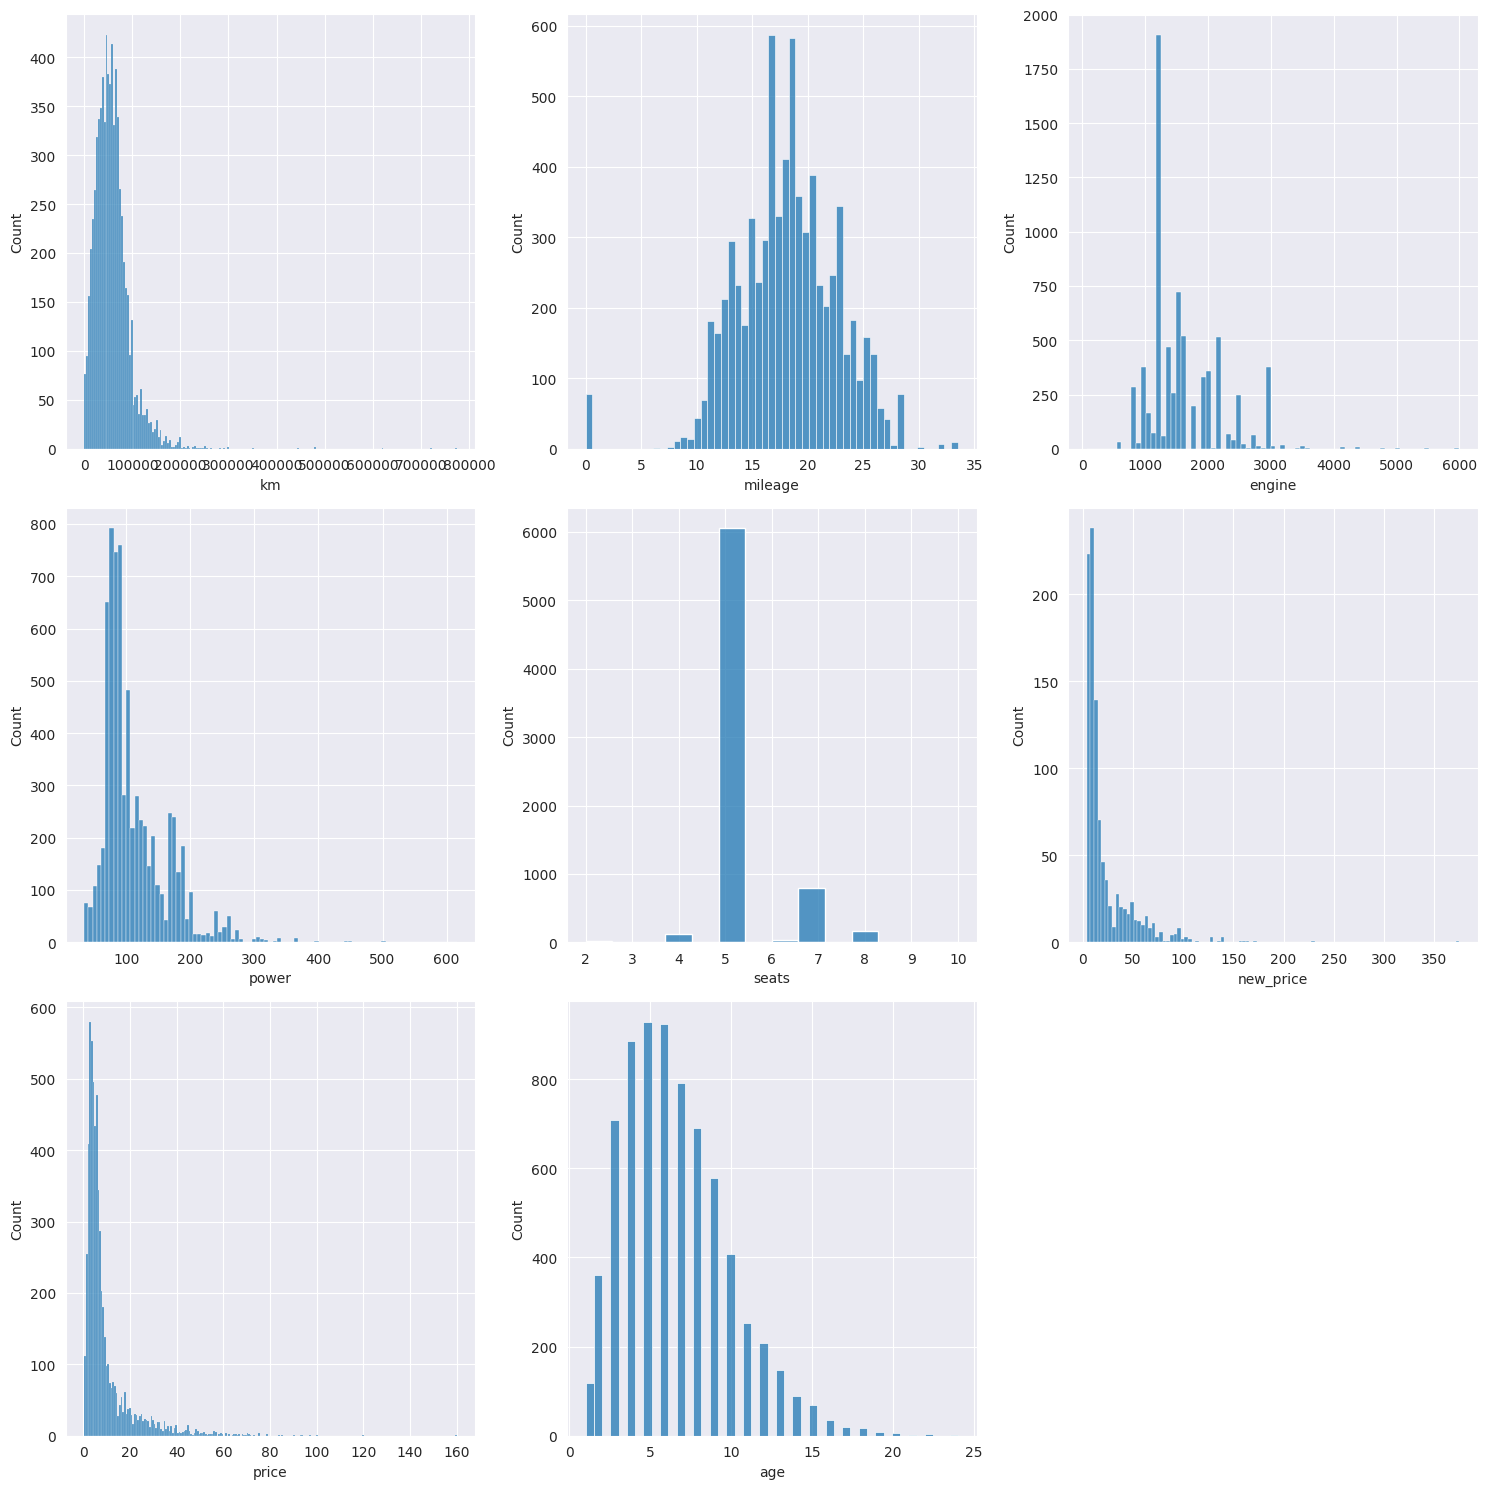

In [31]:
import math
def uni_num_plot(df, cols = 3):
  num_cols = df.select_dtypes(exclude='object').columns
  rows = math.ceil(len(num_cols) / cols)
  fig = plt.figure( figsize=(cols*5, rows*5))
  for i, col in enumerate(num_cols):
      ax=fig.add_subplot(rows,cols,i+1)
      sns.histplot(x = df[col], ax = ax)
  fig.tight_layout()
  plt.show()

uni_num_plot(data)

In [32]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (10, 7), kde = False, bins = None, norm_overlay = False, title = 'Histogram Boxplot', xlabel = '', save_name=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    title: title for the plot (default Histogram Boxplot)
    xlabel: x-axis label (default feature)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, meanline=True, showmeans=True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, palette = "winter"
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

    if xlabel == '':
        ax_hist2.set_xlabel(feature)
    else:
        ax_hist2.set_xlabel(xlabel)
    plt.suptitle(title)
    if save_name == None:
      save_name = feature
    plt.savefig(f'/content/drive/MyDrive/mit-pe/capstone/{save_name}.png')
    plt.show()

### Price - Target Variable

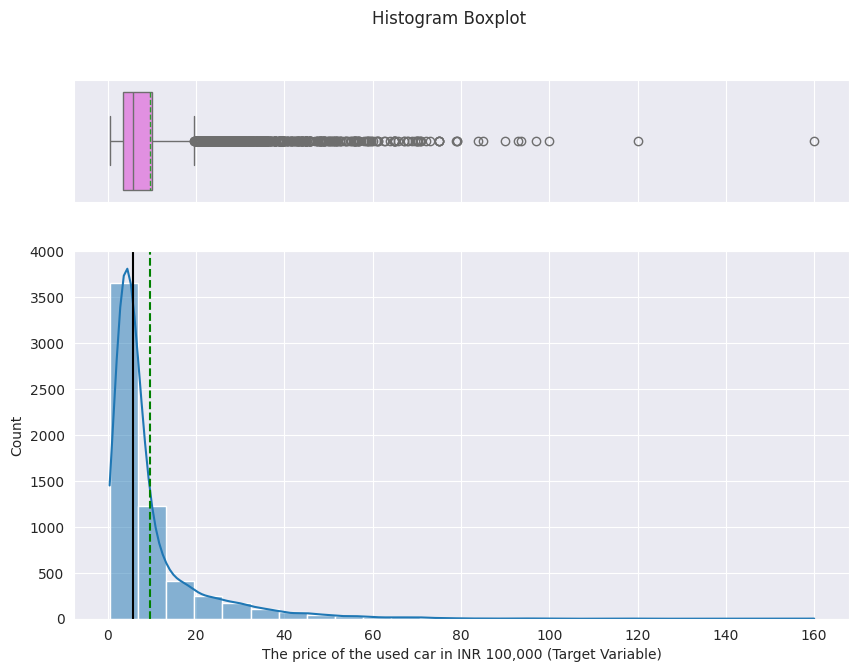

In [33]:
histogram_boxplot(data, feature = "price", kde=True, bins=25, xlabel=feature_lookup['price'])

In [34]:
data.price.isna().sum()

1234

In [35]:
data.price.describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: price, dtype: float64

As the target variable, missing values are going to be impossible to train on. Will need to handle missing values in an intelligent way, if at all.

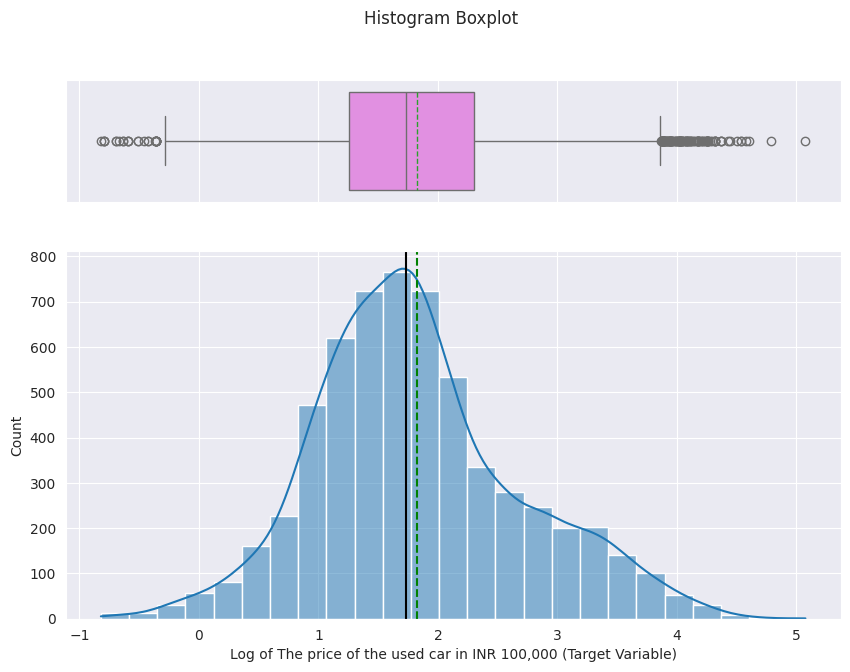

In [36]:
data['price_log'] = np.log(data.price)
histogram_boxplot(data, feature = "price_log", kde=True, bins=25, xlabel='Log of ' + feature_lookup['price'])

Log transforming the target variable, gives it a normalized shaped. This will help me model better.

### Kilometers Driven

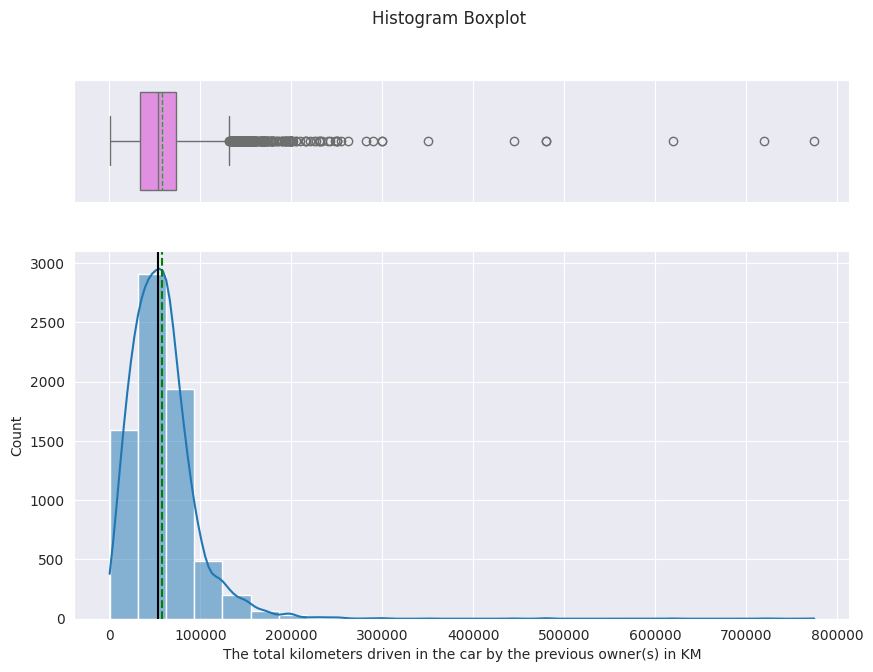

In [37]:
histogram_boxplot(data, feature = "km", kde=True, bins=25, xlabel=feature_lookup['km'])

After taking care of the initial extreme outlier, there is still many outliers. None of them seem to be completely outside the realm of reality. 800k km is just under 500k miles, which I have driven vehicles well into 300k+ miles while still being very functional.

In [38]:
for idx, row in data[data.km > 300000].iterrows():
  print('{} kms in {} years means {} kms/year or {} kms/day'.format(row.km, row.age, row.km/row.age, row.km/(row.age * 365)))

775000 kms in 7 years means 110714.28571428571 kms/year or 303.32681017612526 kms/day
620000 kms in 11 years means 56363.63636363636 kms/year or 154.42092154420922 kms/day
720000 kms in 7 years means 102857.14285714286 kms/year or 281.8003913894325 kms/day
480000 kms in 5 years means 96000.0 kms/year or 263.013698630137 kms/day
480000 kms in 5 years means 96000.0 kms/year or 263.013698630137 kms/day
445000 kms in 7 years means 63571.42857142857 kms/year or 174.16829745596868 kms/day
350000 kms in 8 years means 43750.0 kms/year or 119.86301369863014 kms/day


However some of these larger numbers don't seem to be reasonable for the time frame since manufacturing of the car.

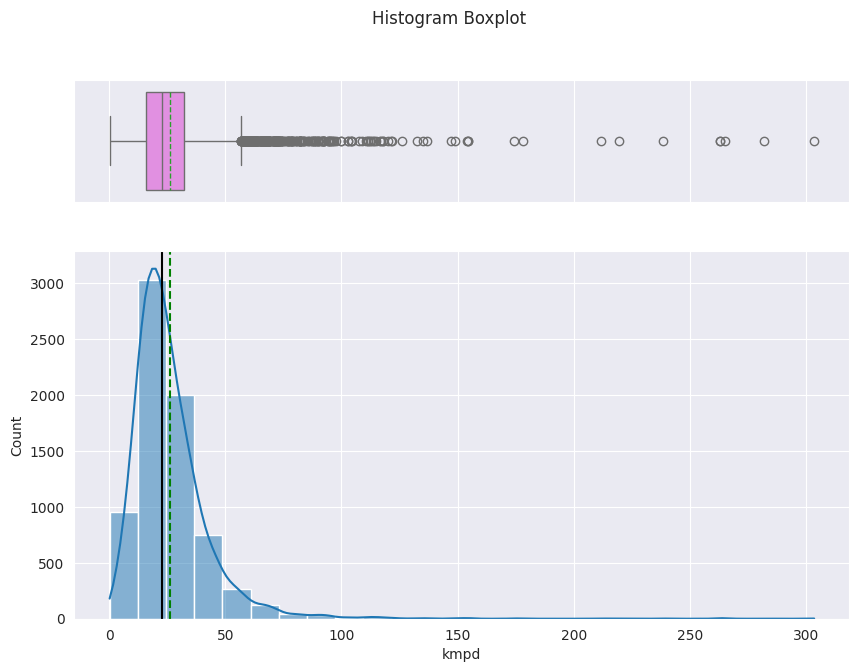

In [39]:
# List of all vehicles claimed to be driven more than 200km a day
tmp = data.copy()
tmp['kmpd'] = (tmp.km / (tmp.age * 365))
histogram_boxplot(tmp, feature = "kmpd", kde=True, bins=25, xlabel='kmpd')

Im putting a hard cut at 150 kmpd, and going to just remove all data above it.

In [40]:
rows_to_drop = data[data.km / (data.age * 365) > 150]
print(rows_to_drop.count())
data = data.drop(rows_to_drop.index)
print(data.count())

name            13
location        13
km              13
fuel_type       13
transmission    13
owner_type      13
mileage         13
engine          13
power           13
seats           13
new_price        3
price           11
age             13
price_log       11
dtype: int64
name            7240
location        7240
km              7240
fuel_type       7240
transmission    7240
owner_type      7240
mileage         7238
engine          7200
power           7104
seats           7194
new_price       1003
price           6008
age             7240
price_log       6008
dtype: int64


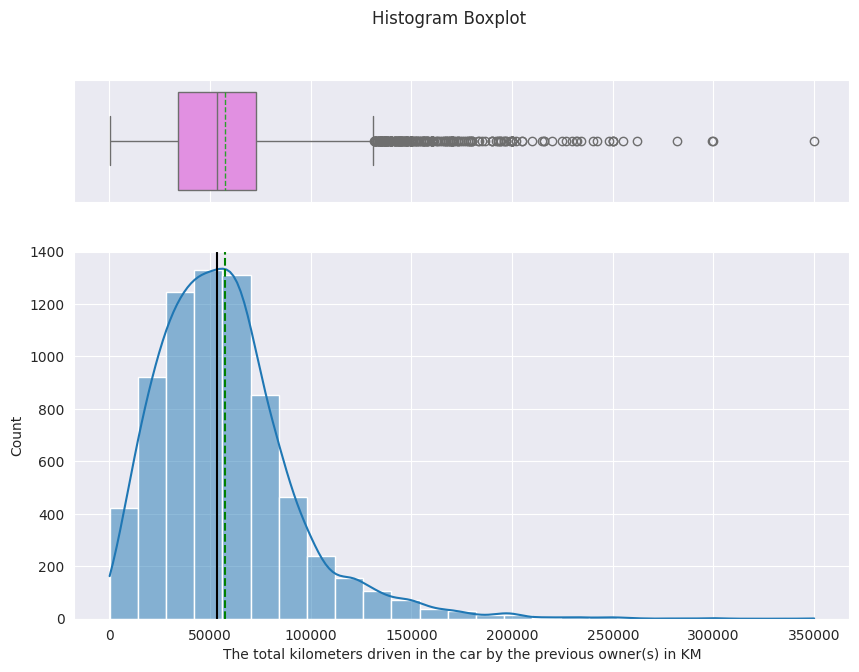

In [41]:
histogram_boxplot(data, feature = "km", kde=True, bins=25, xlabel=feature_lookup['km'])

This seems more reasonable. Lets try to normalize the data.

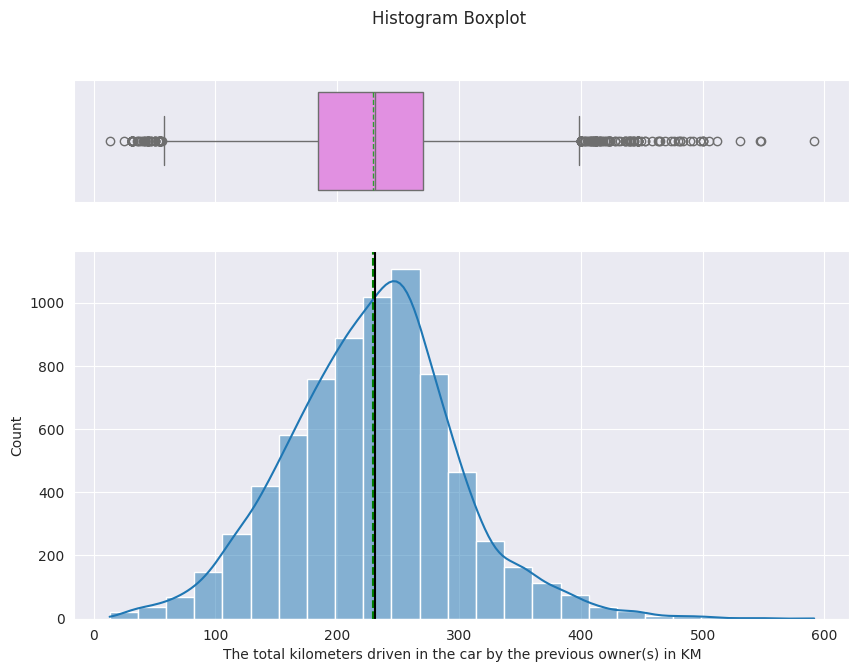

In [42]:
data['km_sqrt'] = np.sqrt(data.km)
histogram_boxplot(data, feature = "km_sqrt", kde=True, bins=25, xlabel=feature_lookup['km'])

Much more normal looking. This is helpful for the model to target a more normal variable.

### Mileage

- One of the immediate issues that I cant solve with just the data set is that mileage has two different scales put in the same data set.
- km per liter and km per kg -- I suspect I will have to drop this column

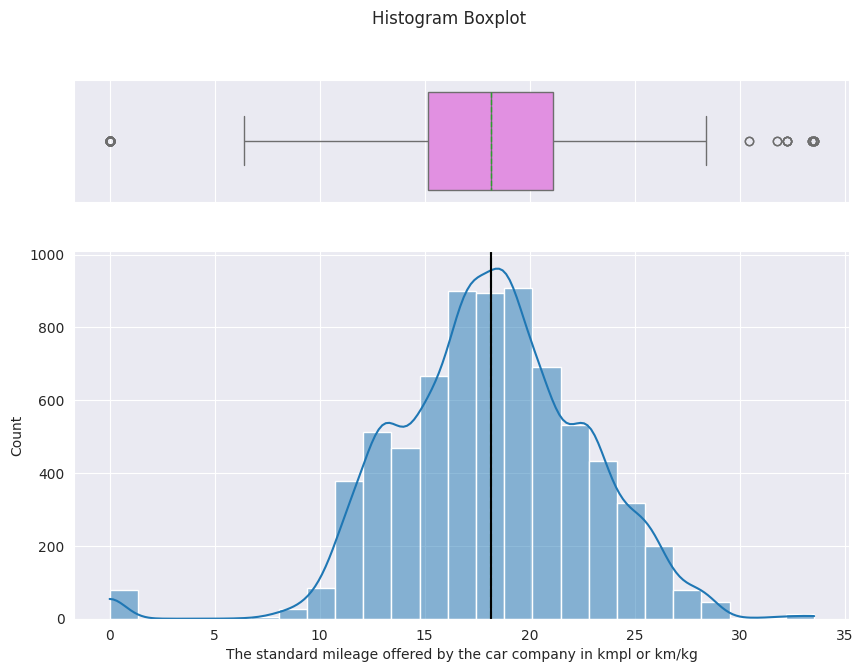

In [43]:
histogram_boxplot(data, feature = "mileage", kde=True, bins=25, xlabel=feature_lookup['mileage'], save_name='mileage_before')

Mileage has a very normalized shape, however zero mileage still makes no sense.

In [44]:
data[data.mileage == 0].fuel_type.value_counts()

fuel_type
Petrol    47
Diesel    31
Name: count, dtype: int64

78 data points is good amount of data. I am planning on putting the median number for petrol and diesel as replacements for the mileage.

In [45]:
petrol_med = data[data.mileage != 0].groupby('fuel_type').mileage.median()['Petrol']
diesel_med = data[data.mileage != 0].groupby('fuel_type').mileage.median()['Diesel']
data.loc[(data.mileage == 0) & (data.fuel_type == 'Petrol'), 'mileage'] = petrol_med
data.loc[(data.mileage == 0) & (data.fuel_type == 'Diesel'), 'mileage'] = diesel_med
data[data.mileage == 0].fuel_type.value_counts()

Series([], Name: count, dtype: int64)

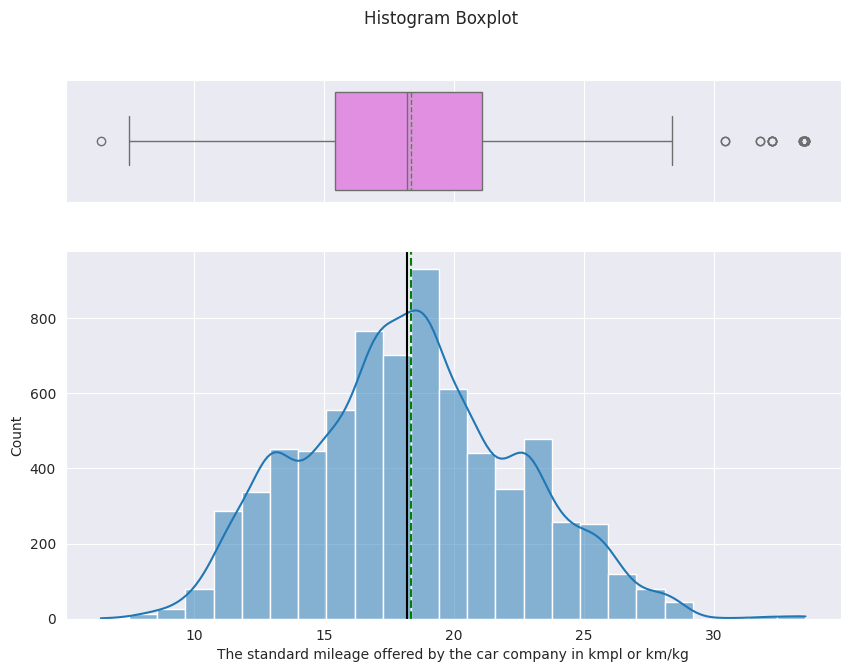

In [46]:
histogram_boxplot(data, feature = "mileage", kde=True, bins=25, xlabel=feature_lookup['mileage'], save_name='mileage_after')

Zero mileage fixed

In [47]:
print(data.mileage.isna().sum())
data[data.fuel_type == 'Electric'].describe().T

2


,count,mean,std,min,25%,50%,75%,max
km,2.0,47000.000000,4242.640687,44000.000000,45500.000000,47000.000000,48500.000000,50000.000000
mileage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,2.0,935.000000,1220.466304,72.000000,503.500000,935.000000,1366.500000,1798.000000
power,2.0,57.000000,22.627417,41.000000,49.000000,57.000000,65.000000,73.000000
seats,2.0,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000
new_price,1.0,13.580000,NaN,13.580000,13.580000,13.580000,13.580000,13.580000
price,2.0,12.875000,0.176777,12.750000,12.812500,12.875000,12.937500,13.000000
age,2.0,6.500000,3.535534,4.000000,5.250000,6.500000,7.750000,9.000000
price_log,2.0,2.555240,0.013731,2.545531,2.550386,2.555240,2.560095,2.564949
km_sqrt,2.0,216.684284,9.789913,209.761770,213.223027,216.684284,220.145541,223.606798


Both of the NA mileage are also the electric vehicles. There is only two. I will deal with these when I get to fuel_type

### Engine

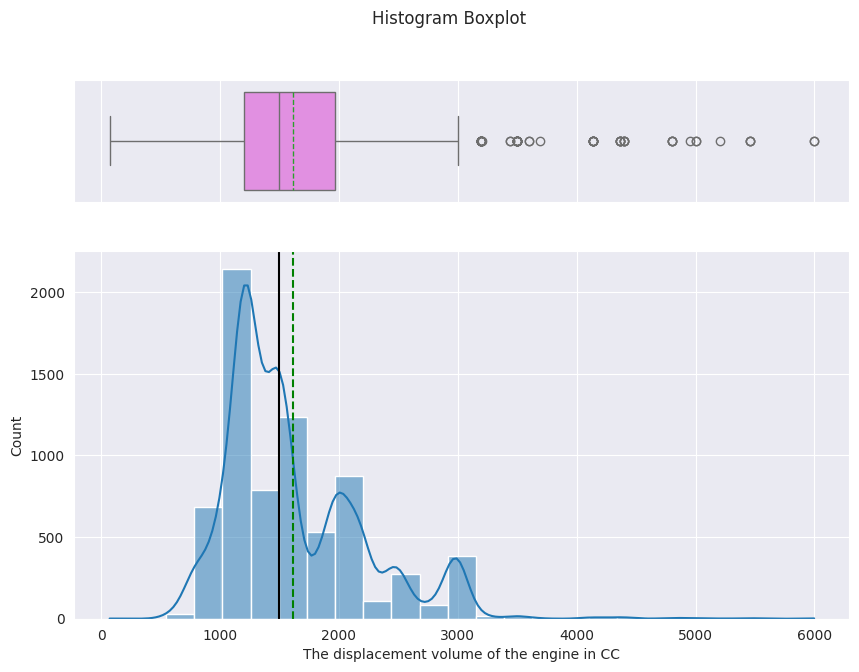

In [48]:
histogram_boxplot(data, feature = "engine", kde=True, bins=25, xlabel=feature_lookup['engine'])

In [49]:
data.engine.describe().T

count    7200.000000
mean     1615.978333
std       595.055555
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: engine, dtype: float64

Skewed right. Examining the outliers.

In [50]:
data[data.engine > 3000].sort_values('engine', ascending=False).head()

,name,location,km,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,age,price_log,km_sqrt
6354,Bentley Flying Spur W12,Bangalore,31200,Petrol,Automatic,Second,10.20,5998.0,616.0,5.0,375.0,NaN,12,NaN,176.635217
5521,Bentley Continental Flying Spur,Hyderabad,48000,Petrol,Automatic,First,8.60,5998.0,552.0,4.0,NaN,59.0,14,4.077537,219.089023
4722,Mercedes-Benz SL-Class SL 500,Kolkata,35000,Petrol,Automatic,First,8.10,5461.0,387.3,2.0,NaN,29.5,10,3.384390,187.082869
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,3000,Petrol,Automatic,Second,12.00,5461.0,421.0,2.0,NaN,90.0,6,4.499810,54.772256
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,NaN,30.0,10,3.401197,187.821724


The largest values are expensive cars, so this makes sense. I will not adjust these outliers

In [51]:
data.engine.isna().sum()

40

In [52]:
data[data.engine.isna()].name.value_counts()

name
Maruti Swift 1.3 VXi                            8
BMW 5 Series 520d Sedan                         7
Hyundai Santro GLS II - Euro II                 4
Maruti Swift 1.3 LXI                            2
Fiat Punto 1.4 Emotion                          2
Land Rover Range Rover 3.0 D                    2
Hyundai Santro Xing XG                          2
Fiat Punto 1.3 Emotion                          1
Hyundai i20 new Sportz AT 1.4                   1
Toyota Etios Liva Diesel TRD Sportivo           1
Skoda Laura 1.8 TSI Ambition                    1
Fiat Punto 1.2 Dynamic                          1
Maruti Wagon R Vx                               1
Honda CR-V AT With Sun Roof                     1
Maruti Swift 1.3 VXI ABS                        1
Hyundai Santro LP zipPlus                       1
Land Rover Range Rover Sport 2005 2012 Sport    1
Maruti Swift 1.3 ZXI                            1
Honda City 1.3 DX                               1
Mahindra TUV 300 P4                          

Unsure about how to handle the 40 NAs in this variable. I will address later

### Power

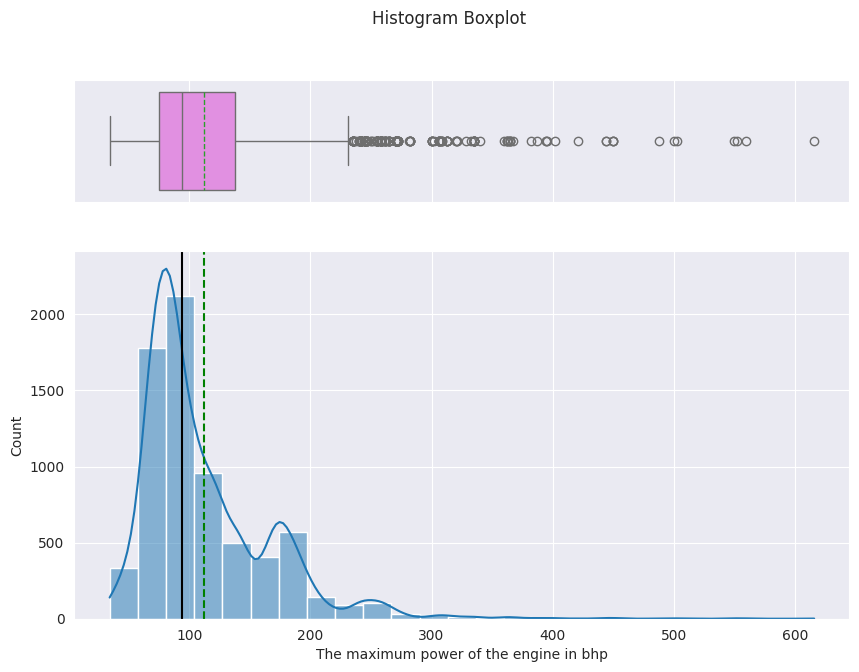

In [53]:
histogram_boxplot(data, feature = "power", kde=True, bins=25, xlabel=feature_lookup['power'])

Right skewed. Id assume this is closely related to engine. Checking outliers.

In [54]:
data[data.power > 350].sort_values('power', ascending=False).head(10)

,name,location,km,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,age,price_log,km_sqrt
6354,Bentley Flying Spur W12,Bangalore,31200,Petrol,Automatic,Second,10.20,5998.0,616.0,5.0,375.0,NaN,12,NaN,176.635217
5781,Lamborghini Gallardo Coupe,Delhi,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,NaN,120.00,9,4.787492,80.622577
5521,Bentley Continental Flying Spur,Hyderabad,48000,Petrol,Automatic,First,8.60,5998.0,552.0,4.0,NaN,59.00,14,4.077537,219.089023
2100,Porsche Cayenne Turbo S,Mumbai,35000,Petrol,Automatic,Second,11.90,4806.0,550.0,5.0,NaN,32.00,10,3.465736,187.082869
5088,Jaguar XJ 5.0 L V8 Supercharged,Coimbatore,43686,Petrol,Automatic,First,10.50,5000.0,503.0,4.0,NaN,50.66,9,3.925137,209.011961
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,73000,Petrol,Automatic,First,8.50,4806.0,500.0,5.0,NaN,14.50,12,2.674149,270.185122
5919,Jaguar F Type 5.0 V8 S,Hyderabad,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,NaN,100.00,5,4.605170,89.442719
4821,BMW 6 Series 630i Coupe,Mumbai,5900,Petrol,Automatic,First,7.94,4395.0,450.0,4.0,NaN,47.50,9,3.860730,76.811457
7057,BMW 6 Series 650i Coupe,Delhi,64000,Petrol,Automatic,First,7.94,4395.0,450.0,4.0,NaN,NaN,11,NaN,252.982213
4627,BMW 6 Series 650i Coupe,Kochi,65329,Petrol,Automatic,First,7.94,4395.0,450.0,4.0,NaN,20.72,10,3.031099,255.595383


Bentleys, Lambos, Porsche and Jaguars make up the most extreme. These arnt mistakes.

In [55]:
data.power.isna().sum()

136

In [56]:
data[data.power.isna()].name.value_counts()

name
Maruti Swift 1.3 VXi                            8
BMW 5 Series 520d Sedan                         7
Hyundai Santro Xing XL eRLX Euro III            7
Hyundai Santro Xing XL                          7
Maruti Swift VDI BSIV W ABS                     6
Hyundai Santro Xing XP                          5
Hyundai Santro Xing XO                          5
Hyundai Santro Xing XO eRLX Euro II             5
Hyundai Santro GLS II - Euro II                 4
Tata Indica DLS                                 4
Ford Fiesta 1.4 SXi TDCi                        4
Nissan Teana 230jM                              3
Hyundai Santro GLS I - Euro II                  3
Maruti Estilo LXI                               3
Hyundai Santro LS zipPlus                       2
Mercedes-Benz E-Class 220 CDI                   2
Maruti Esteem Vxi                               2
Land Rover Range Rover 3.0 D                    2
Hyundai Santro Xing XG                          2
Hyundai Santro Xing XG eRLX Euro III         

As with engine, power has quite a few NAs. Even though there is 139 here, there is only 40 NAs in engine. If these closely correlate, we can probably drop this column.

### Seats

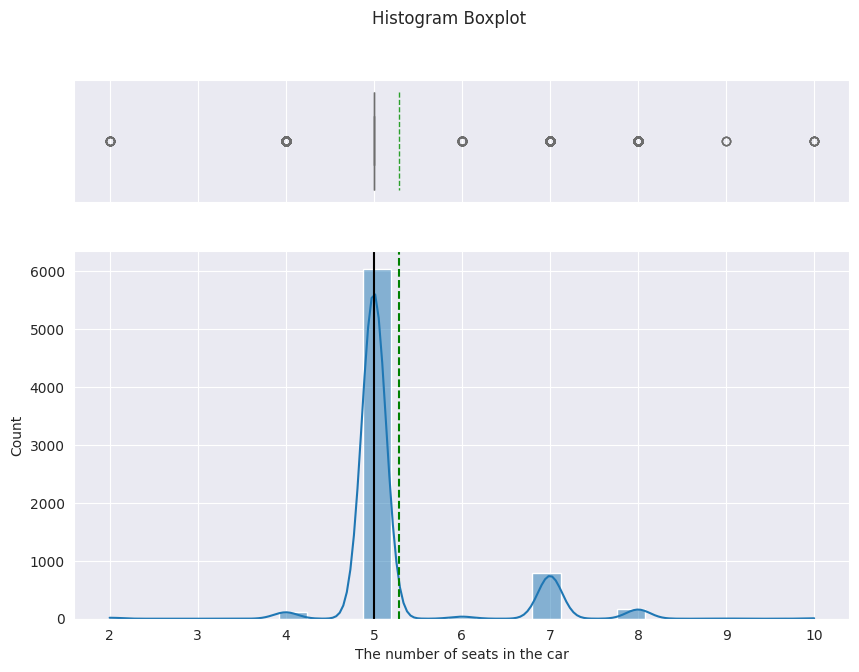

In [57]:
histogram_boxplot(data, feature = "seats", kde=True, bins=25, xlabel=feature_lookup['seats'])

Semi-Ordinal, as more seats means more room in the vehicle. But more doesn't mean better or more expensive. A 2 seat vehicle is generally considered either extreme luxury or extreme modesty. It may be wise to group these into sizings. small (<4 seats), medium (5-6 seats) and large (>6 seats)

In [58]:
data.seats.value_counts()

seats
5.0     6044
7.0      794
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: count, dtype: int64

In [59]:
data.seats.isna().sum()

46

In [60]:
# find seats that are NA and look for a matching name that isnt na
data[data.name.isin(data[data.seats.isna()].name.unique()) & ~data.seats.isna()]

,name,location,km,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,age,price_log,km_sqrt


In [61]:
data[data.seats.isna()].index

Index([ 208,  229,  733,  749, 1294, 1327, 1460, 2074, 2096, 2325, 2335, 2369, 2530, 2542, 2623, 2668, 2737, 2780, 2842, 3272, 3404, 3520, 3522, 3800, 3810, 3882, 4011, 4152, 4229, 4577, 4697, 4712, 4952, 5015, 5185, 5893, 6042, 6541, 6544, 6633,
       6643, 6651, 6677, 6685, 6880, 6957],
      dtype='int64')

I am going to need to compare missing values between data sets. I am seeing a lot of NA's across the same rows

### New Price

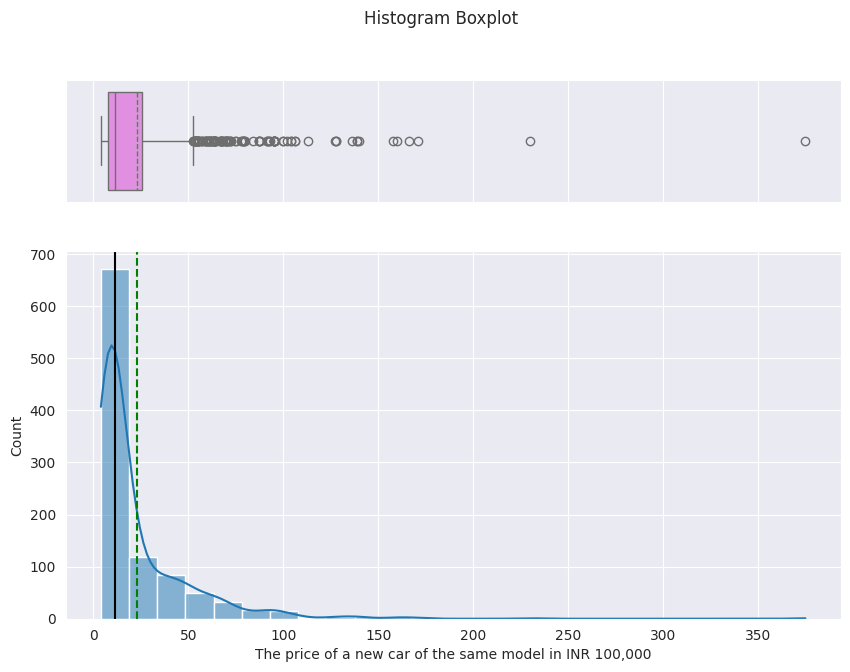

In [62]:
histogram_boxplot(data, feature = "new_price", kde=True, bins=25, xlabel=feature_lookup['new_price'])

In [63]:
data.new_price.isna().sum()

6237

Right skewed again. This data set is missing a lot of values. I don't know how helpful this will be. Instead of imputing I am going to just drop this column.

In [64]:
data = data.drop('new_price', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7240 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7240 non-null   object 
 1   location      7240 non-null   object 
 2   km            7240 non-null   int64  
 3   fuel_type     7240 non-null   object 
 4   transmission  7240 non-null   object 
 5   owner_type    7240 non-null   object 
 6   mileage       7238 non-null   float64
 7   engine        7200 non-null   float64
 8   power         7104 non-null   float64
 9   seats         7194 non-null   float64
 10  price         6008 non-null   float64
 11  age           7240 non-null   int64  
 12  price_log     6008 non-null   float64
 13  km_sqrt       7240 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 848.4+ KB


### Age

- My adjustment of year (2020 - year)

In [65]:
data.age.describe()

count    7240.000000
mean        6.639503
std         3.252489
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        24.000000
Name: age, dtype: float64

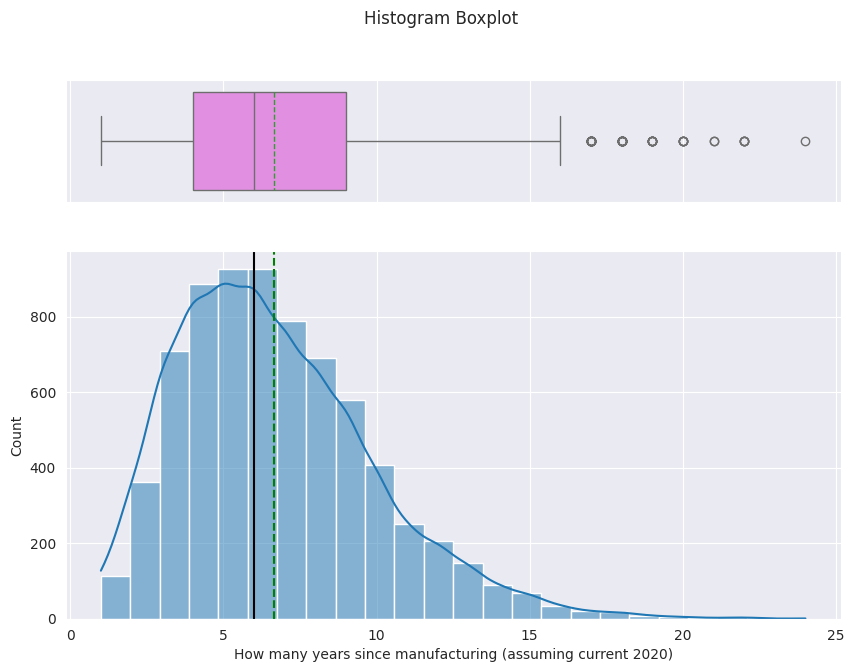

In [66]:
histogram_boxplot(data, feature = "age", kde=True, bins=data.age.max() - data.age.min() + 1, xlabel=feature_lookup['age'])

In [67]:
data.age.isna().sum()

0

Right tailed. No missing values. Integer/discrete variable as we are only counting in whole years.

## Categoric Variables

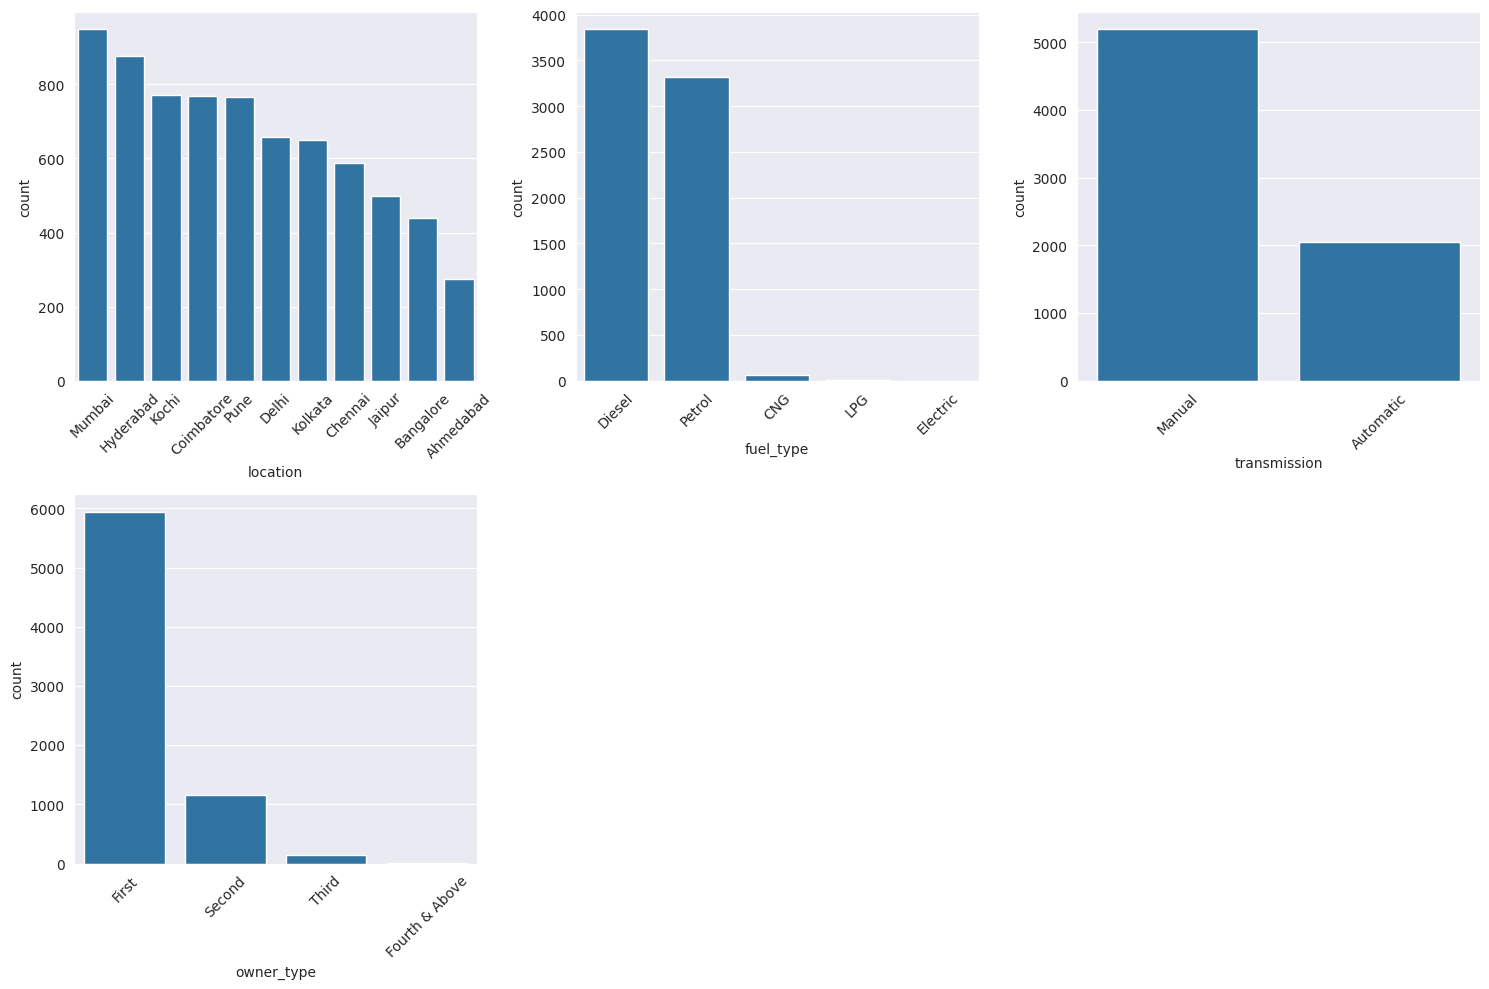

In [68]:
import math
def uni_cat_plot(df, cols = 3):
  num_cols = df.select_dtypes(exclude=np.number).columns
  rows = math.ceil(len(num_cols) / cols)
  fig = plt.figure( figsize=(cols*5, rows*5))
  for i, col in enumerate(num_cols):
      ax=fig.add_subplot(rows,cols,i+1)
      plt.xticks(rotation=45)
      sns.countplot(x = df[col],
                    order=df[col].value_counts().index,
                    ax = ax)
  fig.tight_layout()
  plt.show()

uni_cat_plot(data.drop('name', axis=1))

### Location

In [69]:
data.location.isna().sum()

0

Location is reasonable spread with all locations having a good amount of data points. Larger cities having more data makes sense.

### Fuel Type

In [70]:
data.fuel_type.isna().sum()

0

In [71]:
data[(data.fuel_type != 'Diesel') & (data.fuel_type!='Petrol')].count()

name            76
location        76
km              76
fuel_type       76
transmission    76
owner_type      76
mileage         74
engine          76
power           75
seats           76
price           68
age             76
price_log       68
km_sqrt         76
dtype: int64

All values for fuel type being filled in. Diesel and Petrol having the LARGE majority of data points. Editing the values to Diesel, Petrol and Other

In [72]:
data["fuel_type"] = data.fuel_type.apply(lambda x: x if x == 'Diesel' or x == 'Petrol' else 'Other')
data.fuel_type.value_counts()

fuel_type
Diesel    3842
Petrol    3322
Other       76
Name: count, dtype: int64

Since the non petrol and diesel numbers where so long, I grouped them together

### Transmission

In [73]:
data.transmission.isna().sum()

0

Two variables. This will be one hot encoded.

### Owner Type

In [74]:
data.owner_type.isna().sum()

0

No NA Values

In [75]:
data.owner_type.value_counts()

owner_type
First             5939
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64

Third and Fourth & Above dont appear to have many entries. I may consider combining them

### Attempting to Split Name into Make

In [76]:
data["make"] = data.name.apply(lambda x: x.split(" ")[0].lower())
data.make.value_counts()

make
maruti           1443
hyundai          1336
honda             742
toyota            505
mercedes-benz     380
volkswagen        372
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda             201
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               4
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: count, dtype: int64

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

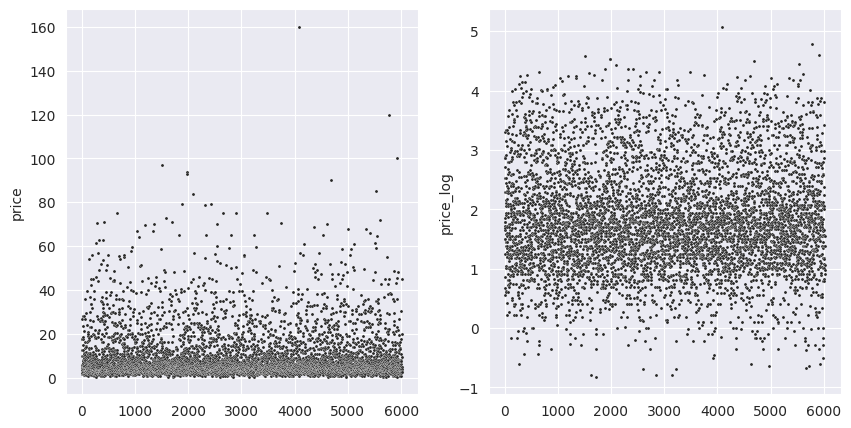

In [77]:
y=data.age
f, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data.price, s=5, color=".15", ax=ax[0])
sns.scatterplot(data.price_log, s=5, color=".15", ax=ax[1])
plt.show()

The price log transformed is a lot less affected by the outliers. This will more than likely be our target variable - log(price)

### Heatmap - Imputing new_price

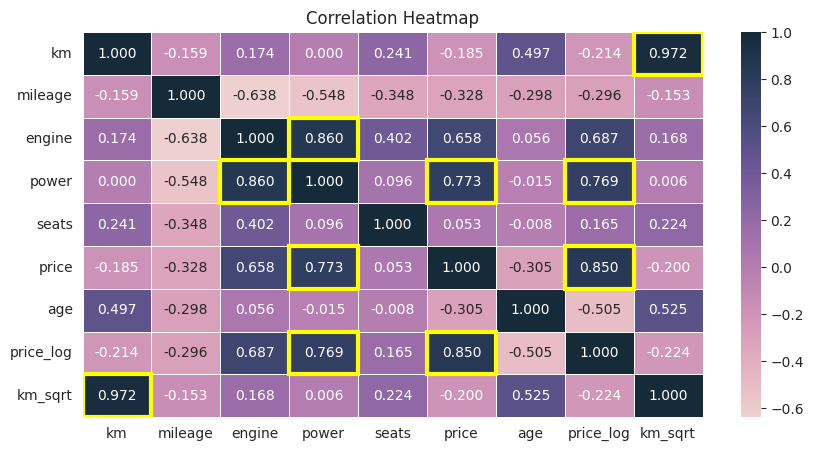

In [78]:
#Lets start by building a heat map of all values
from matplotlib.patches import Rectangle

# show a heatmap that is built from corr() matrix, that highlights cells +/- a threshold
def heatmap_highlight(df, hl_threshold=0.70, hl_color='yellow'):
  corr = df.corr()
  plt.figure(figsize = (10, 5))
  h = sns.heatmap(corr, annot = True, fmt = ".3f", linewidth=0.5, cmap = sns.color_palette("ch:s=-.6,r=.6", as_cmap=True))
  h.set_title('Correlation Heatmap')
  x, y = corr.shape
  for i in range(x):
    for j in range(y):
      if((corr.iloc[i, j] >= hl_threshold or corr.iloc[i, j] <= (-1 * hl_threshold)) and i != j):
        h.add_patch(Rectangle((i, j), 1, 1, fill=False, edgecolor=hl_color, lw=3))
  plt.show()

heatmap_highlight(data.select_dtypes(include=np.number))

Engine and power are strongly coorelated. This is good because I am missing a lot of power and fewer engine. I can can get better data by imputing engine values than the more power values I am missing. Since they are strongly correlated - I can focus on engine values.

price/price_log are also.



### Box plots all categorical variables

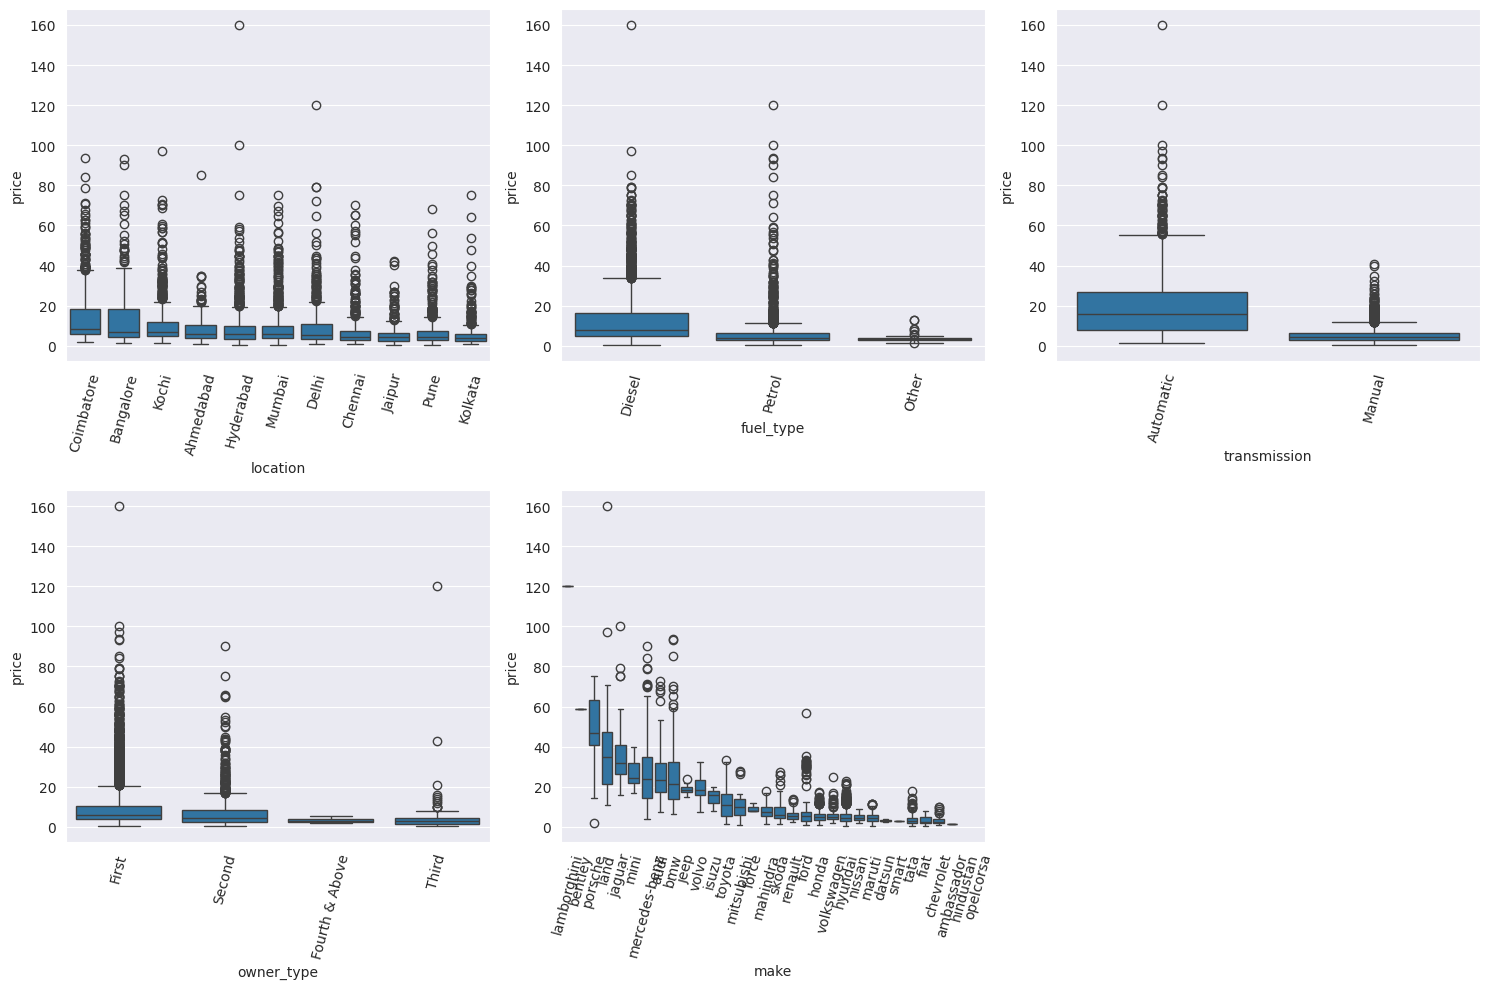

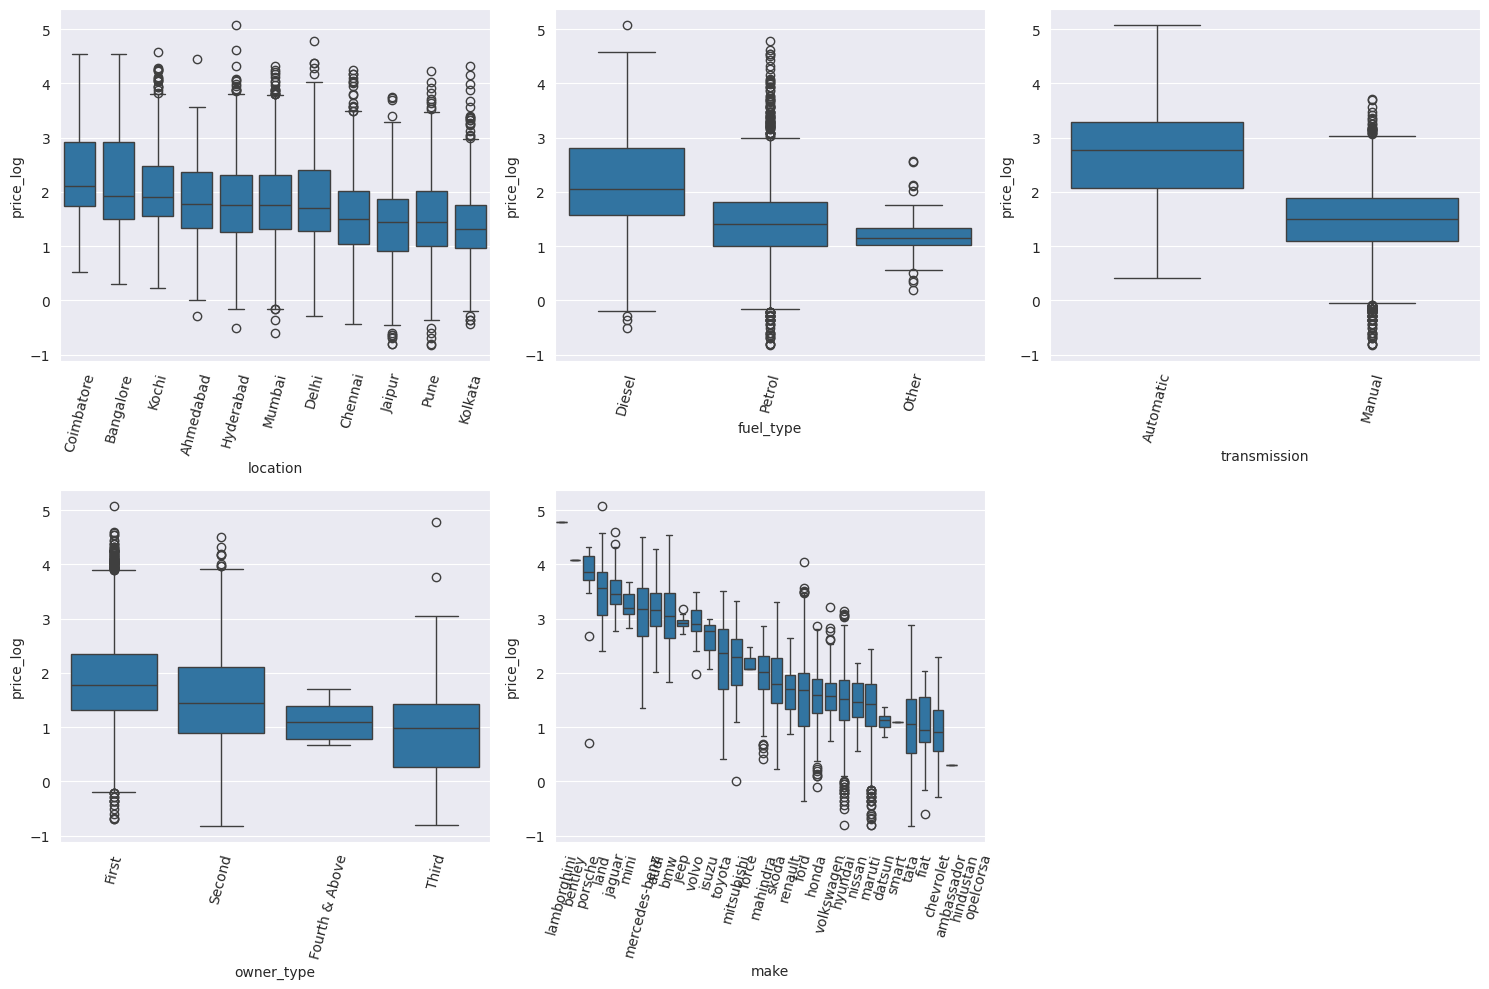

In [79]:
import math
def multi_box_plot(data, ycol, xcols, cols=3):
  num_cols = xcols
  rows = math.ceil(len(num_cols) / cols)
  fig = plt.figure( figsize=(cols*5, rows*5))
  for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    plt.xticks(rotation=75)
    sns.boxplot(y=data[ycol],
                x = data[col],
                order=data.groupby(col).price.median().sort_values(ascending=False).index,
                ax = ax)
  fig.tight_layout()
  plt.show()

multi_box_plot(data, 'price', data.drop('name', axis=1).select_dtypes(exclude=np.number).columns)
multi_box_plot(data, 'price_log', data.drop('name', axis=1).select_dtypes(exclude=np.number).columns)

Location - The majority of used cars sell for about the same. Outliers above, but it looks fairly consistant for the IQR. Coimbatore and Bangalore seem to have 3rd Q. Ranges that wre a little bit higher.

Fuel Type - Diesel vehicles have a statistical significant higher price.

Transmission - Automatics are more expensive.

Owner Type - As expected First owner vehicles sell for more than second. Fourth has a higher median than third does, but this may be because of small sample.

Make - Nothing surprising here. Luxury vehicles resell for more.

Comparing price vs price_log shows why the log transformed target variable is going to better. The median values for make are very linear, and the values for the other categories are much more apparent.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

This is already done. Using make alone.

### **Missing value treatment**

### Start with engine and power

In [80]:
# Find what makes have missing engine values
data[data.engine.isna()].make.value_counts()

make
maruti      13
hyundai      8
bmw          7
fiat         4
land         3
honda        2
skoda        1
toyota       1
mahindra     1
Name: count, dtype: int64

In [81]:
data[data.power.isna()].make.value_counts()

make
hyundai          56
maruti           28
ford              8
bmw               7
fiat              6
tata              4
nissan            4
land              3
honda             3
mahindra          3
toyota            3
porsche           2
mercedes-benz     2
skoda             2
smart             1
chevrolet         1
volkswagen        1
audi              1
hindustan         1
Name: count, dtype: int64

In [82]:
makes = data.make.value_counts().index
# Get median values of all makes who are missing an engine
med_eng_values_by_make = data[data.make.isin(makes)].groupby('make').engine.median()
med_eng_values_by_make

make
ambassador       1489.0
audi             1968.0
bentley          5998.0
bmw              1995.0
chevrolet        1199.0
datsun           1198.0
fiat             1248.0
force            2200.0
ford             1498.0
hindustan        1995.0
honda            1497.0
hyundai          1197.0
isuzu            2749.0
jaguar           2179.0
jeep             1956.0
lamborghini      5204.0
land             2179.0
mahindra         2179.0
maruti           1197.0
mercedes-benz    2143.0
mini             1598.0
mitsubishi       2477.0
nissan           1461.0
opelcorsa        1389.0
porsche          2967.0
renault          1461.0
skoda            1798.0
smart             799.0
tata             1248.0
toyota           2494.0
volkswagen       1498.0
volvo            1985.0
Name: engine, dtype: float64

In [83]:
# replace all missing engine values with the median value for that make
eng_na = data[data.engine.isna()]
for idx, row in eng_na.iterrows():
  data.at[idx, 'engine'] = med_eng_values_by_make[row.make]

In [84]:
# should be no missing values
data[data.engine.isna()].make.value_counts()

Series([], Name: count, dtype: int64)

In [85]:
# same with power
med_pwr_values_by_make = data[data.make.isin(makes)].groupby('make').power.median()
med_pwr_values_by_make

make
ambassador        35.50
audi             174.33
bentley          584.00
bmw              190.00
chevrolet         79.40
datsun            67.00
fiat              90.60
force            139.01
ford              89.84
hindustan           NaN
honda             98.60
hyundai           82.00
isuzu            147.50
jaguar           212.55
jeep             170.00
lamborghini      560.00
land             187.70
mahindra         120.00
maruti            74.00
mercedes-benz    186.00
mini             113.98
mitsubishi       172.78
nissan            84.80
opelcorsa         88.00
porsche          300.00
renault           83.80
skoda            108.49
smart               NaN
tata              74.00
toyota           125.00
volkswagen       103.20
volvo            190.00
Name: power, dtype: float64

In [86]:
# replace all missing power values with the median value for that make
pwr_na = data[data.power.isna()]
for idx, row in pwr_na.iterrows():
  data.at[idx, 'power'] = med_pwr_values_by_make[row.make]

In [87]:
# should be no missing values except two cars which we dont have much data on
data[data.power.isna()].make.value_counts()

make
smart        1
hindustan    1
Name: count, dtype: int64

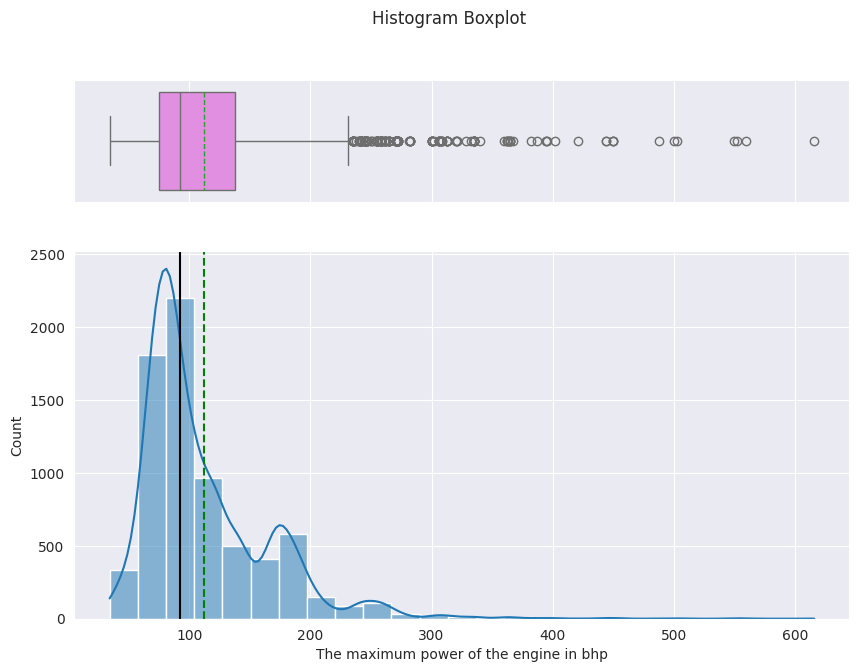

In [88]:
histogram_boxplot(data, feature = "power", kde=True, bins=25, xlabel=feature_lookup['power'])

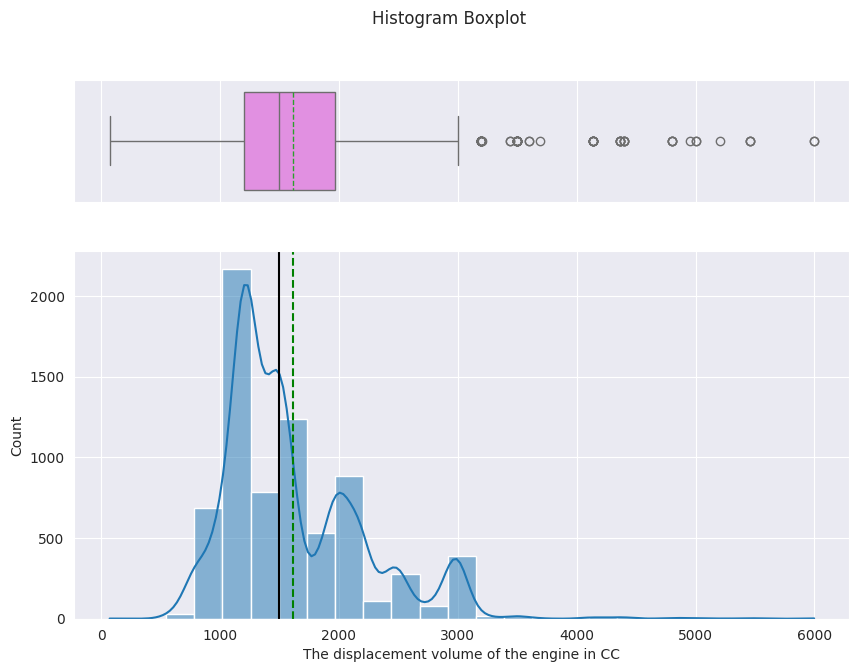

In [89]:
histogram_boxplot(data, feature = "engine", kde=True, bins=25, xlabel=feature_lookup['engine'])

In [90]:
missing_values = data[data.power.isna()].make.value_counts().index
data[data.make.isin(missing_values)]

,name,location,km,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,age,price_log,km_sqrt,make
915,Smart Fortwo CDI AT,Pune,103000,Diesel,Automatic,Second,19.01,799.0,NaN,2.0,3.0,12,1.098612,320.936131,smart
6216,Hindustan Motors Contessa 2.0 DSL,Pune,65000,Diesel,Manual,Second,14.10,1995.0,NaN,5.0,NaN,24,NaN,254.950976,hindustan


We have filled in all the power and engine stats for the missing values except these two. I will just drop these two values.

In [91]:
data = data.drop([915, 6216])
data[data.make.isin(missing_values)]

,name,location,km,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,age,price_log,km_sqrt,make


### Seats Next - missing values

In [92]:
data[data.seats.isna()].name.value_counts()

name
Maruti Swift 1.3 VXi                            8
BMW 5 Series 520d Sedan                         7
Hyundai Santro GLS II - Euro II                 4
Maruti Estilo LXI                               3
Land Rover Range Rover 3.0 D                    2
Maruti Swift 1.3 LXI                            2
Fiat Punto 1.4 Emotion                          2
Hyundai Santro Xing XG                          2
Fiat Punto 1.3 Emotion                          1
Mahindra TUV 300 P4                             1
Hyundai i20 new Sportz AT 1.4                   1
Toyota Etios Liva Diesel TRD Sportivo           1
Skoda Laura 1.8 TSI Ambition                    1
Fiat Punto 1.2 Dynamic                          1
Maruti Wagon R Vx                               1
Honda CR-V AT With Sun Roof                     1
Ford Endeavour Hurricane LE                     1
Ford Figo Diesel                                1
Maruti Swift 1.3 VXI ABS                        1
Hyundai Santro LP zipPlus                    

In [93]:
names_missing_seats = data[data.seats.isna()].name.value_counts().index
data[data.name.isin(names_missing_seats)].seats

208    NaN
229    NaN
733    NaN
749    NaN
1294   NaN
1327   NaN
1460   NaN
2074   NaN
2096   NaN
2325   NaN
2335   NaN
2369   NaN
2530   NaN
2542   NaN
2623   NaN
2668   NaN
2737   NaN
2780   NaN
2842   NaN
3272   NaN
3404   NaN
3520   NaN
3522   NaN
3800   NaN
3810   NaN
3882   NaN
4011   NaN
4152   NaN
4229   NaN
4577   NaN
4697   NaN
4712   NaN
4952   NaN
5015   NaN
5185   NaN
5893   NaN
6042   NaN
6541   NaN
6544   NaN
6633   NaN
6643   NaN
6651   NaN
6677   NaN
6685   NaN
6880   NaN
6957   NaN
Name: seats, dtype: float64

None of the vehicles missing a seat have other vehicles of the same name with listed seats. Going to fill with google.

In [94]:
# key value pairs found with google
seats_fill = {
  'Maruti Swift 1.3 VXi':5,
  'BMW 5 Series 520d Sedan':5,
  'Hyundai Santro GLS II - Euro II':5,
  'Maruti Estilo LXI':5,
  'Land Rover Range Rover 3.0 D':7,
  'Maruti Swift 1.3 LXI':5,
  'Fiat Punto 1.4 Emotion':5,
  'Hyundai Santro Xing XG':5,
  'Fiat Punto 1.3 Emotion':5,
  'Mahindra TUV 300 P4':9,
  'Hyundai i20 new Sportz AT 1.4':5,
  'Toyota Etios Liva Diesel TRD Sportivo':5,
  'Skoda Laura 1.8 TSI Ambition':5,
  'Fiat Punto 1.2 Dynamic':5,
  'Maruti Wagon R Vx':5,
  'Honda CR-V AT With Sun Roof':5,
  'Ford Endeavour Hurricane LE':7,
  'Ford Figo Diesel':5,
  'Maruti Swift 1.3 VXI ABS':5,
  'Hyundai Santro LP zipPlus':5,
  'Land Rover Range Rover Sport 2005 2012 Sport':5,
  'Maruti Swift 1.3 ZXI':5,
  'Honda City 1.3 DX':5,
  'Honda Jazz 2020 Petrol':5
}


na_seats = data[data.seats.isna()]

for idx, row in na_seats.iterrows():
  data.at[ idx ,'seats'] = seats_fill[row['name']]

data[data.seats.isna()].name.value_counts()

Series([], Name: count, dtype: int64)

All seats have values! Wonderful

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7238 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7238 non-null   object 
 1   location      7238 non-null   object 
 2   km            7238 non-null   int64  
 3   fuel_type     7238 non-null   object 
 4   transmission  7238 non-null   object 
 5   owner_type    7238 non-null   object 
 6   mileage       7236 non-null   float64
 7   engine        7238 non-null   float64
 8   power         7238 non-null   float64
 9   seats         7238 non-null   float64
 10  price         6007 non-null   float64
 11  age           7238 non-null   int64  
 12  price_log     6007 non-null   float64
 13  km_sqrt       7238 non-null   float64
 14  make          7238 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 1.1+ MB


Finally we need drop all the rows that do not have a price and mileage

In [96]:
data_no_price = data[data.price.isna()]
data = data[~data.price.isna()]
data = data[~data.mileage.isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6005 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          6005 non-null   object 
 1   location      6005 non-null   object 
 2   km            6005 non-null   int64  
 3   fuel_type     6005 non-null   object 
 4   transmission  6005 non-null   object 
 5   owner_type    6005 non-null   object 
 6   mileage       6005 non-null   float64
 7   engine        6005 non-null   float64
 8   power         6005 non-null   float64
 9   seats         6005 non-null   float64
 10  price         6005 non-null   float64
 11  age           6005 non-null   int64  
 12  price_log     6005 non-null   float64
 13  km_sqrt       6005 non-null   float64
 14  make          6005 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 750.6+ KB


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

A. price/price_log is the target variable, name means nothing and we are going to use sqrt(km)

In [97]:
# Reset data index and split into independent and dependent
data = data.reset_index(drop=True)
y = data.price_log
x = data.drop(['name', 'price', 'price_log', 'km'], axis=1)

In [98]:
#encoding the categorical variables
x = pd.get_dummies(x)
x

,mileage,engine,power,seats,age,km_sqrt,location_Ahmedabad,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,fuel_type_Diesel,fuel_type_Other,fuel_type_Petrol,transmission_Automatic,transmission_Manual,owner_type_First,owner_type_Fourth & Above,owner_type_Second,owner_type_Third,make_ambassador,make_audi,make_bentley,make_bmw,make_chevrolet,make_datsun,make_fiat,make_force,make_ford,make_honda,make_hyundai,make_isuzu,make_jaguar,make_jeep,make_lamborghini,make_land,make_mahindra,make_maruti,make_mercedes-benz,make_mini,make_mitsubishi,make_nissan,make_porsche,make_renault,make_skoda,make_tata,make_toyota,make_volkswagen,make_volvo
0,26.60,998.0,58.16,5.0,10,268.328157,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,19.67,1582.0,126.20,5.0,5,202.484567,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,18.20,1199.0,88.70,5.0,9,214.476106,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20.77,1248.0,88.76,7.0,8,294.957624,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,15.20,1968.0,140.80,5.0,7,201.668044,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000,28.40,1248.0,74.00,5.0,6,165.423698,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6001,24.40,1120.0,71.00,5.0,5,316.227766,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6002,14.00,2498.0,112.00,8.0,8,234.520788,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
6003,18.90,998.0,67.10,5.0,7,214.476106,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [99]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=13)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, index = x_train.index, columns = x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, index = x_test.index, columns = x_test.columns)
x_train_scaled

,mileage,engine,power,seats,age,km_sqrt,location_Ahmedabad,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,fuel_type_Diesel,fuel_type_Other,fuel_type_Petrol,transmission_Automatic,transmission_Manual,owner_type_First,owner_type_Fourth & Above,owner_type_Second,owner_type_Third,make_ambassador,make_audi,make_bentley,make_bmw,make_chevrolet,make_datsun,make_fiat,make_force,make_ford,make_honda,make_hyundai,make_isuzu,make_jaguar,make_jeep,make_lamborghini,make_land,make_mahindra,make_maruti,make_mercedes-benz,make_mini,make_mitsubishi,make_nissan,make_porsche,make_renault,make_skoda,make_tata,make_toyota,make_volkswagen,make_volvo
2696,0.659543,0.116115,0.103271,0.375,0.095238,0.273040,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2810,0.320560,0.289356,0.201217,0.625,0.285714,0.483133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2505,0.648489,0.092296,0.068087,0.375,0.238095,0.615056,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,0.407148,0.161705,0.125143,0.625,0.095238,0.294059,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
862,0.401621,0.068664,0.049068,0.375,0.666667,0.572898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.594694,0.143655,0.103709,0.375,0.047619,0.304859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
866,0.700074,0.104578,0.075637,0.375,0.047619,0.273058,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2790,0.165807,0.348530,0.343857,0.375,0.380952,0.366566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.372144,0.106811,0.100038,0.375,0.142857,0.336775,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have a transformed, scaled and ready to go data set!

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

Linear Regression First

In [101]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

#returns mae_train, mae_test, rmse_train, rmse_test, mape_train, mape_test, rs_train, r2_test
def model_stats(model, x_train, y_train, x_test, y_test):

    # In-sample Prediction
    y_pred_train = model.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = model.predict(x_test)
    y_observed_test = y_test

    return (
      mean_absolute_error(y_pred_train, y_observed_train),
      mean_absolute_error(y_pred_test, y_observed_test),
      np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
      np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
      mean_absolute_percentage_error(y_pred_train, y_observed_train),
      mean_absolute_percentage_error(y_pred_test, y_observed_test),
      r2_score(y_pred_train, y_observed_train),
      r2_score(y_pred_test, y_observed_test)
      )

# Model Performance on test and train data
def model_perf(model, x_train, y_train,  x_test, y_test):
  (mae_train, mae_test, rmse_train, rmse_test, mape_train, mape_test, r2_train, r2_test) = model_stats(model, x_train, y_train, x_test, y_test)
  print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "MAE": [mae_train, mae_test],
                "RMSE": [ rmse_train, rmse_test],
                "MAPE" : [ mape_train, mape_test ],
                "r2": [ r2_train, r2_test ]
            }
        )
    )

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def check_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [103]:
# Create a base model with everything
model0 = sm.OLS(y_train, x_train_scaled).fit()
print(model0.summary())
print(check_vif(x_train_scaled))
print(model_perf(model0, x_train_scaled, y_train, x_test_scaled, y_test))

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1243.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:24:20   Log-Likelihood:                 166.44
No. Observations:                4804   AIC:                            -232.9
Df Residuals:                    4754   BIC:                             90.97
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
mileage               

This is a fanastic first run. Engine and power being highly coorelated, I am going to drop one. I am going to pick power simply because I had to impute more values for it.

In [104]:
x_train_scaled = x_train_scaled.drop('power', axis=1)
x_test_scaled = x_test_scaled.drop('power', axis=1)

In [105]:
model1 = sm.OLS(y_train, x_train_scaled).fit()
print(model1.summary())
print(check_vif(x_train_scaled))
print(model_perf(model1, x_train_scaled, y_train, x_test_scaled, y_test))

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1085.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:24:23   Log-Likelihood:                -179.54
No. Observations:                4804   AIC:                             457.1
Df Residuals:                    4755   BIC:                             774.5
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
mileage               

VIF Scores are all below 5. R2 for test is higher than train and both are above 90%. MAE, RMSE and MAPE are all very good.

In [106]:
# Fitting linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()

cv_score11 = cross_val_score(linearregression, x_train_scaled, y_train, cv = 10)

cv_score12 = cross_val_score(linearregression, x_train_scaled, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_score11.mean(), cv_score11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_score12.mean(), cv_score12.std()*2))

RSquared: 0.913 (+/- 0.022)
Mean Squared Error: 0.066 (+/- 0.017)


With a CV of 10, this score is also very good.

Check Linear Rgression Assumptions

In [107]:
print('{:.16f}'.format(model1.resid.mean()))

-0.0000000000000029


This is a fantastic residual mean.

### Tests for Normality

<Axes: ylabel='Count'>

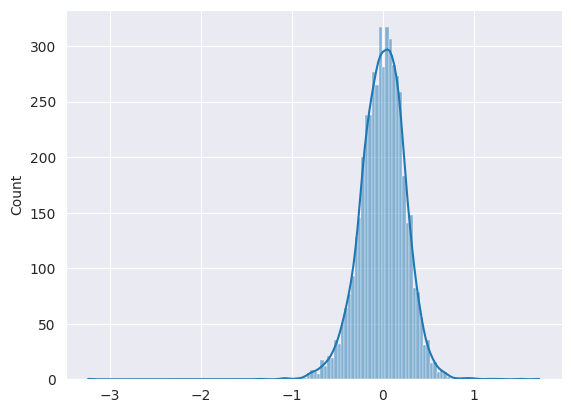

In [108]:
sns.histplot(model1.resid, kde=True)

The residuals are very normal, so that is good.

### Linearity of Variables

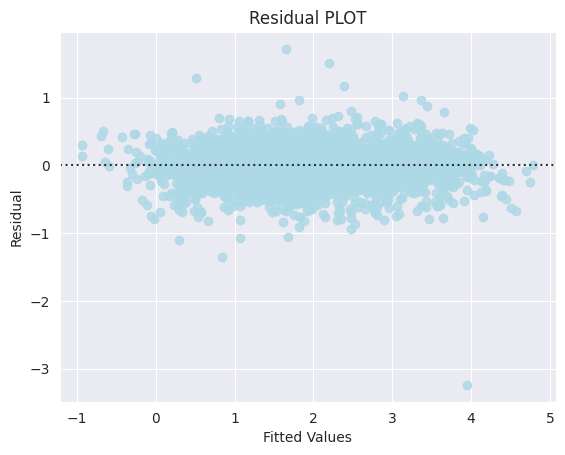

In [109]:
sns.residplot(x = model1.fittedvalues, y = model1.resid, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

There appears to be no pattern in the residuals, thus linearity assumption is satisfied

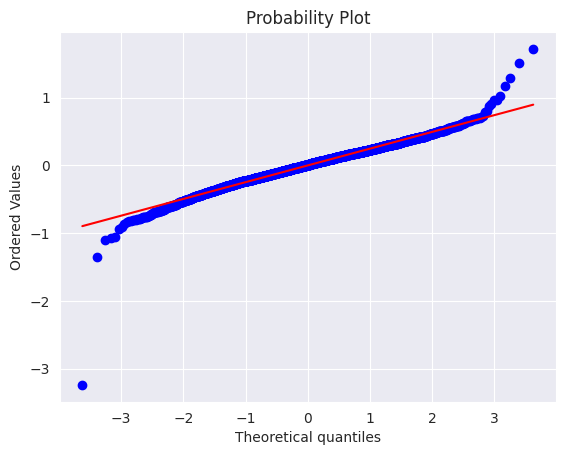

In [110]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats
stats.probplot(model1.resid, dist = "norm", plot = pylab)
plt.show()

In [111]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model1.resid, x_train_scaled)
lzip(name, test)

[('F statistic', 0.9693875720890561), ('p-value', 0.774639266942903)]

Null hypothesis with the Goldfeld Quandt test is that the residuals are homoscedastic. The p-value is greater than 0.05. Fail to reject the null hypothesis. The residuals are very likely homoscedastic.

In [112]:
# These test predictions will be on a log scale
test_predictions = model1.predict(x_test_scaled)

# We are converting the log scale predictions to its original scale
test_predictions_inverse_transformed = np.exp(test_predictions)

test_predictions_inverse_transformed.describe()

count    1201.000000
mean        9.560709
std        10.759886
min         0.613372
25%         3.824991
50%         5.491715
75%         9.823569
max        86.462887
dtype: float64

In [113]:
np.exp(y_test).describe()

count    1201.000000
mean       10.082015
std        12.453168
min         0.600000
25%         3.500000
50%         5.800000
75%        10.490000
max       160.000000
Name: price_log, dtype: float64

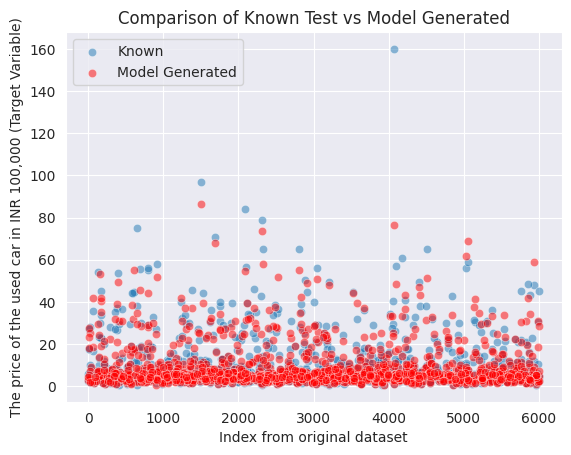

In [114]:
sns.scatterplot(np.exp(y_test), label="Known", alpha=0.5);
sns.scatterplot(test_predictions_inverse_transformed, color='red', label='Model Generated', alpha=0.5);
plt.title('Comparison of Known Test vs Model Generated')
plt.legend(loc=0)
plt.xlabel('Index from original dataset')
plt.ylabel(feature_lookup['price'])
plt.show()

In [115]:
coef = model1.params
# Let us write the equation of the model
print("log ( price ) = Sum of (")
for i in range(len(coef)):
  feat = coef.index[i]
  print('({0:.3f}) * {1}'.format(coef[i],coef.index[i]))
print(")")

log ( price ) = Sum of (
(-0.507) * mileage
(2.733) * engine
(0.168) * seats
(-2.626) * age
(-0.401) * km_sqrt
(0.204) * location_Ahmedabad
(0.337) * location_Bangalore
(0.231) * location_Chennai
(0.281) * location_Coimbatore
(0.139) * location_Delhi
(0.298) * location_Hyderabad
(0.126) * location_Jaipur
(0.159) * location_Kochi
(-0.039) * location_Kolkata
(0.151) * location_Mumbai
(0.160) * location_Pune
(0.851) * fuel_type_Diesel
(0.606) * fuel_type_Other
(0.590) * fuel_type_Petrol
(1.103) * transmission_Automatic
(0.944) * transmission_Manual
(0.520) * owner_type_First
(0.682) * owner_type_Fourth & Above
(0.460) * owner_type_Second
(0.386) * owner_type_Third
(0.000) * make_ambassador
(0.552) * make_audi
(0.612) * make_bentley
(0.615) * make_bmw
(-0.507) * make_chevrolet
(-0.669) * make_datsun
(-0.412) * make_fiat
(-0.078) * make_force
(-0.298) * make_ford
(-0.102) * make_honda
(-0.157) * make_hyundai
(-0.654) * make_isuzu
(0.628) * make_jaguar
(0.213) * make_jeep
(1.291) * make_lamb

In [116]:
sorted_coef = coef.sort_values()
print('Largest Price Detractors')
for i in range(1,10):
  print('{} - {}'.format(sorted_coef.index[i],sorted_coef[i]))

sorted_coef = coef.sort_values(ascending=False)
print('-'*10)
print('Largest Price Enhancers')
for i in range(1,10):
  print('{} - {}'.format(sorted_coef.index[i],sorted_coef[i]))

Largest Price Detractors
make_tata - -0.6737146186579898
make_datsun - -0.6690878914999415
make_isuzu - -0.6535504162829557
make_chevrolet - -0.5069907951859758
mileage - -0.5069895535955349
make_fiat - -0.41155885361512873
km_sqrt - -0.4005867334156499
make_mahindra - -0.39414863352289803
make_ford - -0.29769276975204484
----------
Largest Price Enhancers
make_lamborghini - 1.2905648320579208
transmission_Automatic - 1.1032027417341264
transmission_Manual - 0.9444095216122681
make_mini - 0.9307704779550817
fuel_type_Diesel - 0.8507308706707455
make_land - 0.787454856217734
owner_type_Fourth & Above - 0.6822191315483955
make_jaguar - 0.6280676977551031
make_bmw - 0.6152053607565616


### Major take aways
- #### Price Reducers (Lower Resale Price)
- Make: Tata, Datsun, Isuzu and Chevrolet all hold value the least well
- Mileage and KM Driven both have a large impact on price reduction

- #### Price Enhancers (Higher Resale Price)
- Make: Lamborghini, mini, land rover, jaguaru and BMW
- Transmission - Automatic over Manual
- Fuel Type - Diesel Fuel is prefered
- Fourth or Above Owner - This is surprising, but must mean these cars are in good condition

In [117]:
# for ease of use
lin_regr_model = model1

## Ridge Model

In [118]:
from sklearn.linear_model import Ridge
ridge_model0 = Ridge()
ridge_model0.fit(x_train, y_train)

Ridge()

In [119]:
print(model_perf(ridge_model0, x_train, y_train, x_test, y_test))

    Data       MAE      RMSE      MAPE        r2
0  Train  0.176009  0.233842  0.737472  0.921679
1   Test  0.172570  0.230705  0.162337  0.926524
None


In [120]:
ridge_model_scaled0 = Ridge()
ridge_model_scaled0.fit(x_train_scaled, y_train)
print(model_perf(ridge_model_scaled0, x_train_scaled, y_train, x_test_scaled, y_test))

    Data       MAE      RMSE      MAPE        r2
0  Train  0.192561  0.251641  0.204278  0.907254
1   Test  0.189273  0.251052  0.255721  0.911556
None


In [121]:
ridge_model_scaled0.get_params()


{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

While the $R^2$ is slightly worse with the scaled independent variables, the MAPE for the training data is brought back down.

### **Hyperparameter Tuning: Decision Tree**

In [122]:
# take in an array of (tree based) models and plot the r2 values
def tree_r2_plot(models_array, name=None):
  r2_train_scores =[]
  r2_test_scores = []

  largest_depth = len(models_array) + 1

  for depth in range(1, largest_depth):
    (_, _, _, _, _, _, r2_train, r2_test) = model_stats(models_array[depth-1], x_train, y_train, x_test, y_test)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)

  plt.plot(range(1, largest_depth), r2_train_scores, '-o', label = "r2 train")
  plt.plot(range(1, largest_depth), r2_test_scores, '-o', label = "r2 test")
  plt.legend(loc = 'best')
  plt.xlabel('max depth')
  plt.ylabel('r2 score')
  # Setting the range of the Y-axis
  plt.ylim(0.5, 1.0)
  plt.title(f"R2 Scores")
  fig = plt.gcf()
  fig.set_size_inches(10, 6)
  if(name != None):
    plt.savefig(f'/content/drive/MyDrive/mit-pe/capstone/{name}.png')
  plt.show()


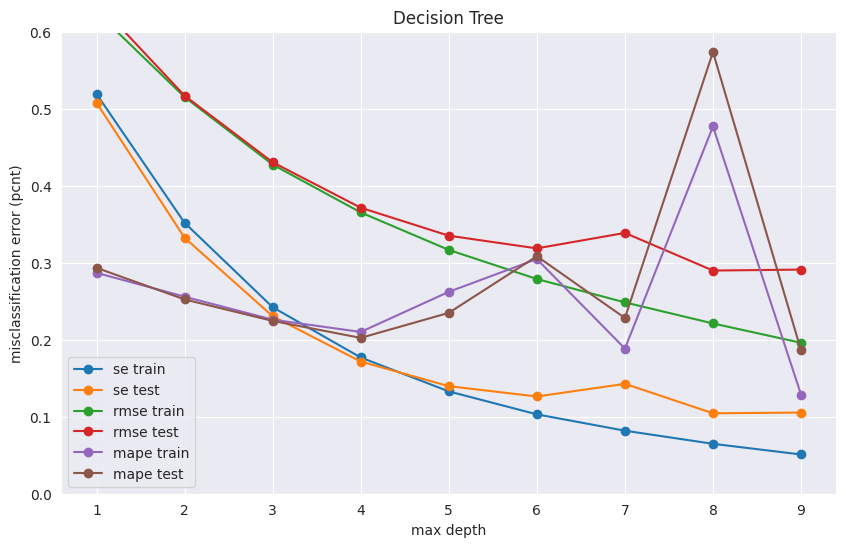

In [123]:
from sklearn.tree import DecisionTreeRegressor

#this should make every run the same
np.random.seed(7)

train_scores = []
test_scores = []
rmse_train_scores =[]
rmse_test_scores = []
mape_train_scores =[]
mape_test_scores =[]
regrs = []

largest_depth = 10

# Build a model from 1 - 10 depth and store it in regrs[depth-1]
for depth in range(1, largest_depth):
  regrs.append(DecisionTreeRegressor(criterion = 'squared_error', max_depth = depth))
  regrs[depth-1] = regrs[depth-1].fit(x_train, y_train)
  train_scores.append(1 - regrs[depth-1].score(x_train, y_train))
  test_scores.append(1 - regrs[depth-1].score(x_test, y_test))
  (mae_train, mae_test, rmse_train, rmse_test, mape_train, mape_test, r2_train, r2_test) = model_stats(regrs[depth-1], x_train, y_train, x_test, y_test)
  rmse_train_scores.append(rmse_train)
  rmse_test_scores.append(rmse_test)
  mape_train_scores.append(mape_train)
  mape_test_scores.append(mape_test)


plt.plot(range(1, largest_depth), train_scores, '-o', label = "se train")
plt.plot(range(1, largest_depth), test_scores, '-o', label = "se test")
plt.plot(range(1, largest_depth), rmse_train_scores, '-o', label = "rmse train")
plt.plot(range(1, largest_depth), rmse_test_scores, '-o', label = "rmse test")
plt.plot(range(1, largest_depth), mape_train_scores, '-o', label = "mape train")
plt.plot(range(1, largest_depth), mape_test_scores, '-o', label = "mape test")
plt.legend(loc = 'best')
plt.xlabel('max depth')
plt.ylabel('misclassification error (pcnt)')
# Setting the range of the Y-axis
plt.ylim(0, 0.6)
plt.title(f"Decision Tree")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

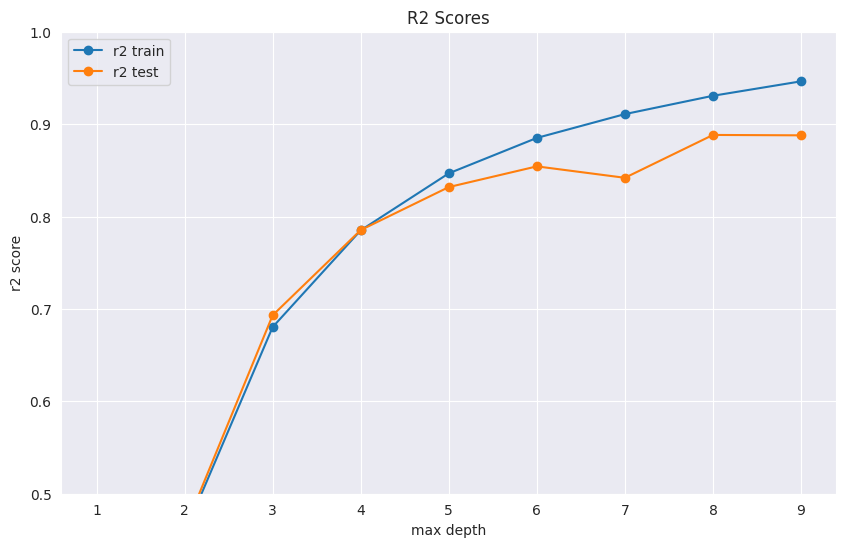

In [124]:
tree_r2_plot(regrs, 'regrs')

Mape seems to being some wild things, I am going to choose a max depth of 6 for readability and a good balance of errors and r2.

In [125]:
decision_tree_model = regrs[5]

In [126]:
model_perf(decision_tree_model, x_train, y_train, x_test, y_test)

    Data       MAE      RMSE      MAPE        r2
0  Train  0.214427  0.278857  0.304719  0.885068
1   Test  0.234246  0.318629  0.308425  0.854276


These numbers are pretty good for a basic decision tree.

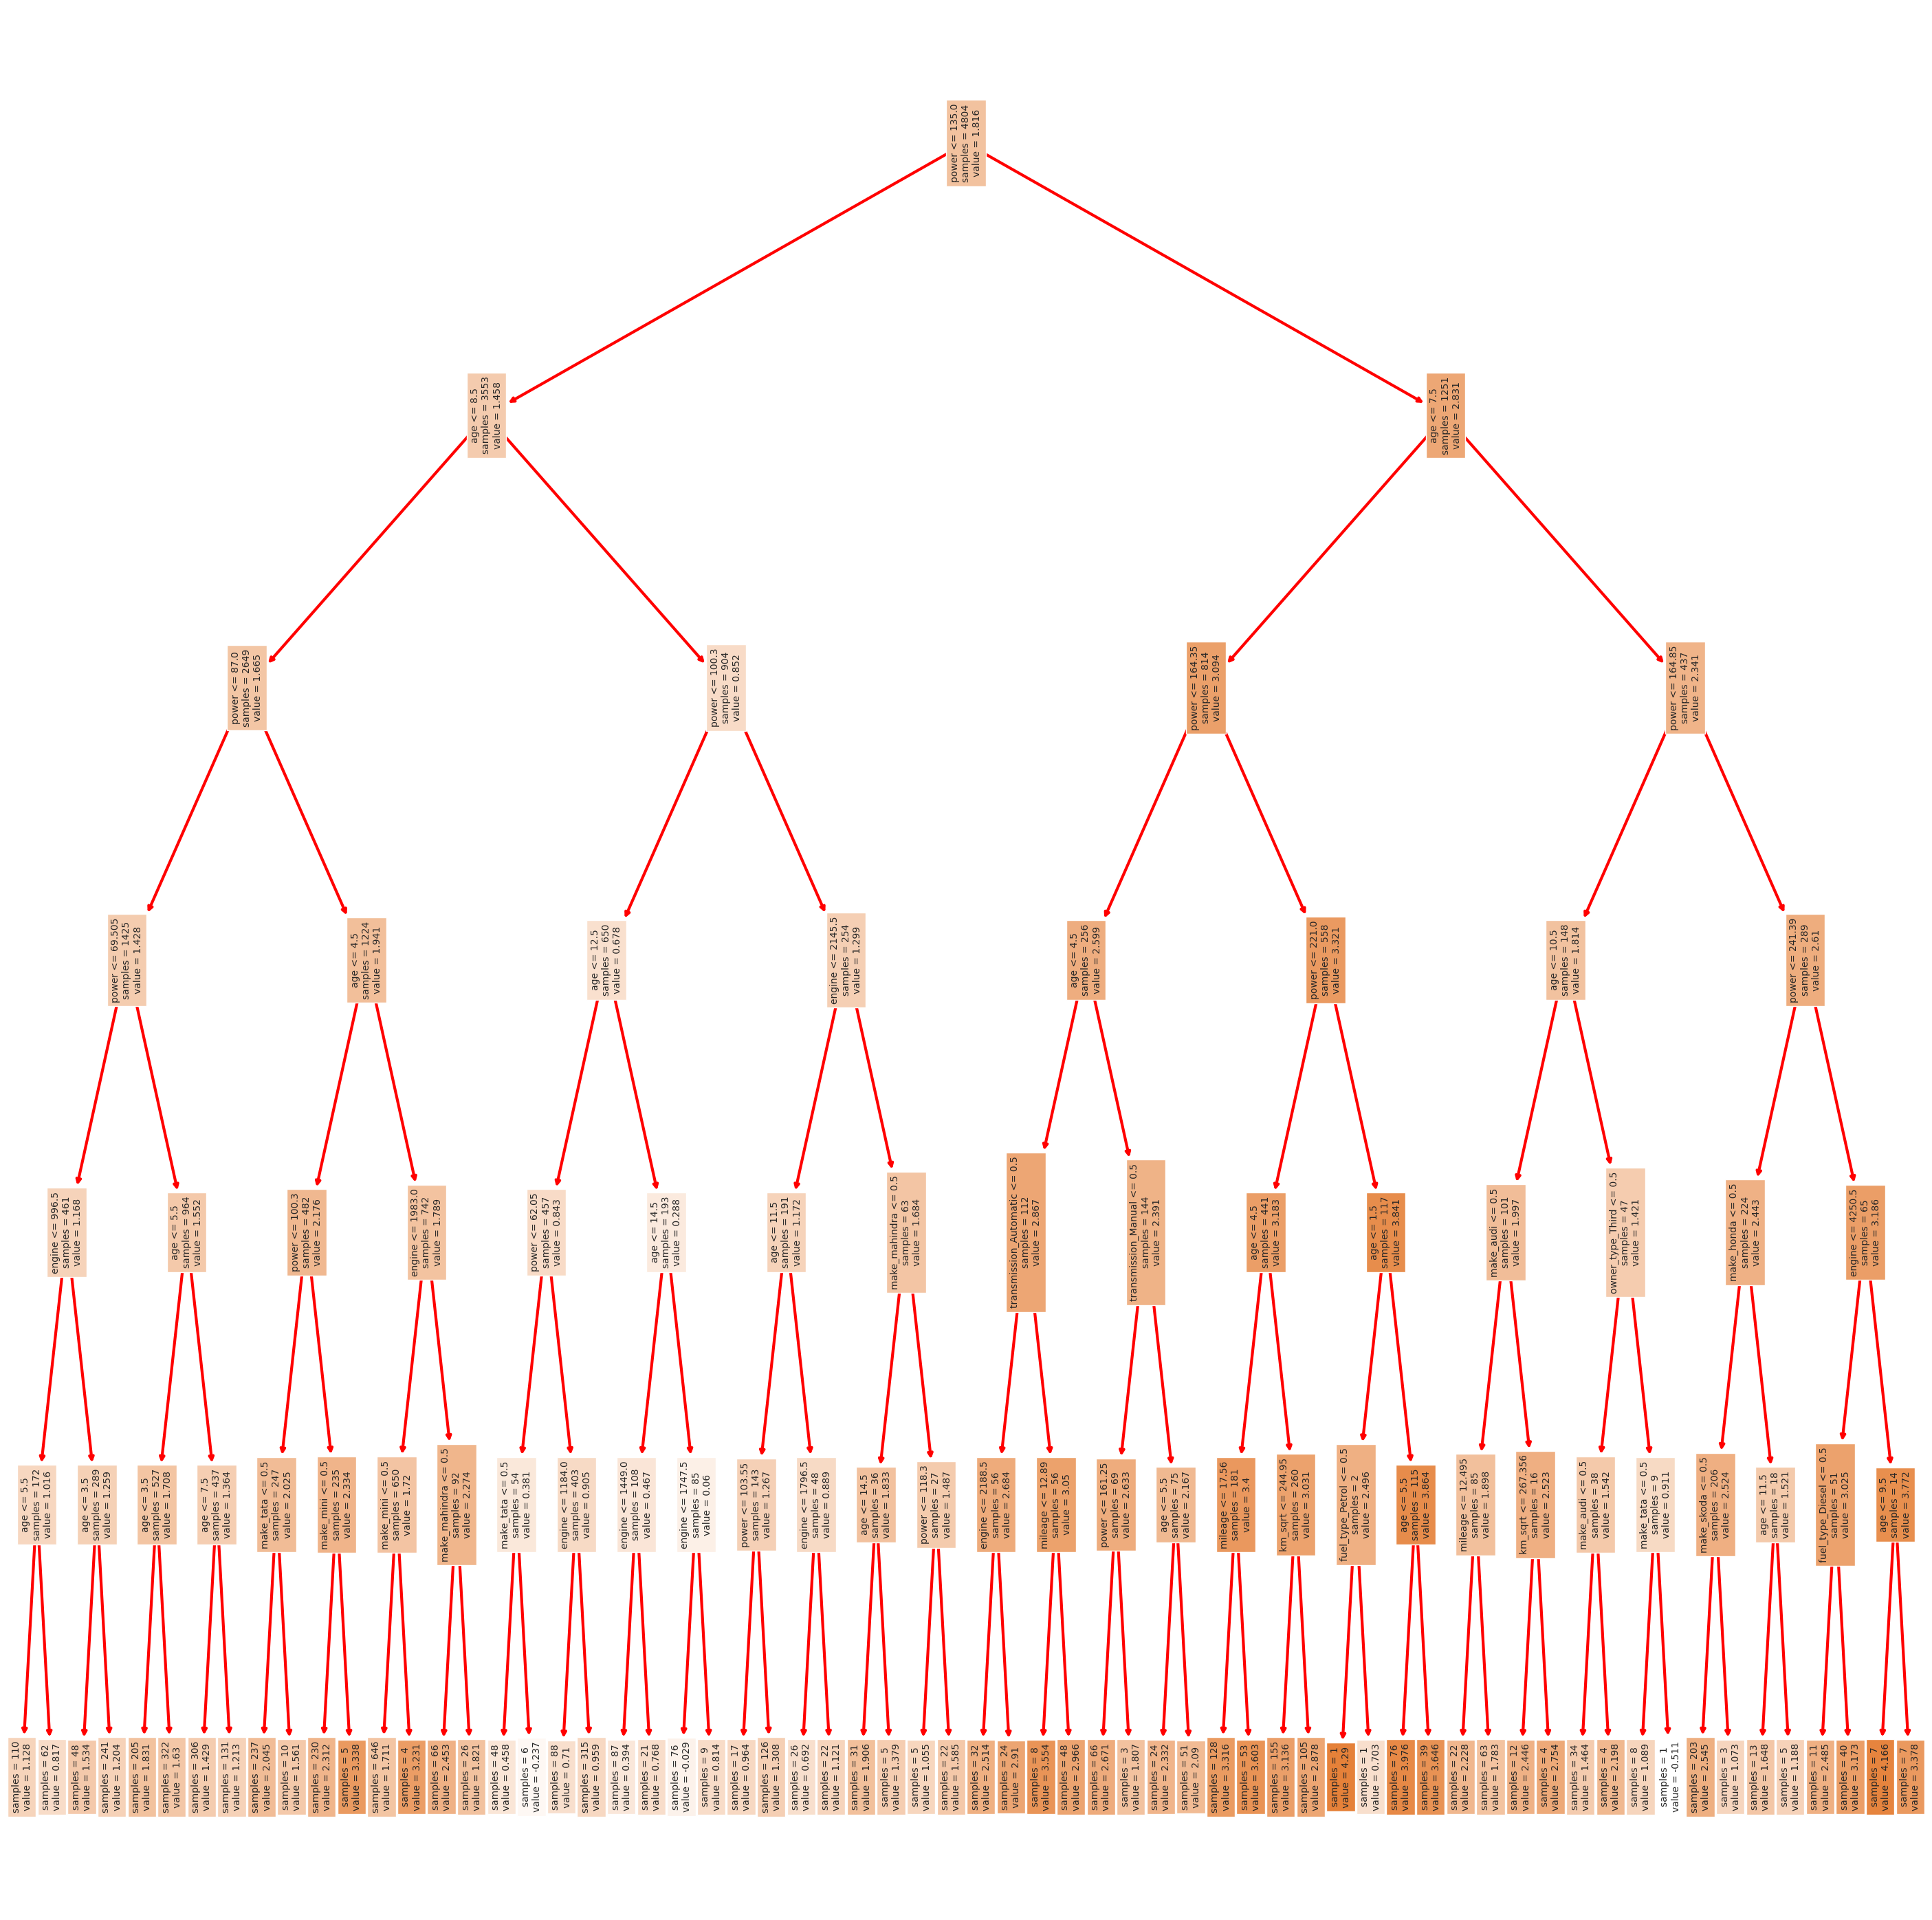

In [127]:
from sklearn import tree
regr = decision_tree_model # 7th model
fig, ax = plt.subplots(figsize = (36, 36))

out = tree.plot_tree(regr, fontsize = 10, max_depth = 6, impurity = False, filled = True, class_names = True, feature_names=x_train.columns)

for o in out:

  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('red')
    arrow.set_linewidth(3)

  # make the labels readable
  o.set_rotation(90)


# Display the plot
plt.show()

**Feature Importance**

In [128]:
def tree_model_importance(model):
  feats = pd.DataFrame(np.column_stack((model.feature_names_in_,model.feature_importances_)))
  feats.columns = ['feature','importance']
  return feats.sort_values(by='importance', ascending=False)

tree_model_importance(decision_tree_model).head(10)

,feature,importance
2,power,0.702419
4,age,0.246679
1,engine,0.020416
35,make_honda,0.005129
45,make_mini,0.00441
42,make_mahindra,0.002855
0,mileage,0.002675
21,transmission_Manual,0.0024
27,make_audi,0.002211
51,make_tata,0.002184


### Power, age take over the large majority of importance. Engine is third and then it falls off significantly.

### **Hyperparameter Tuning: Random Forest**



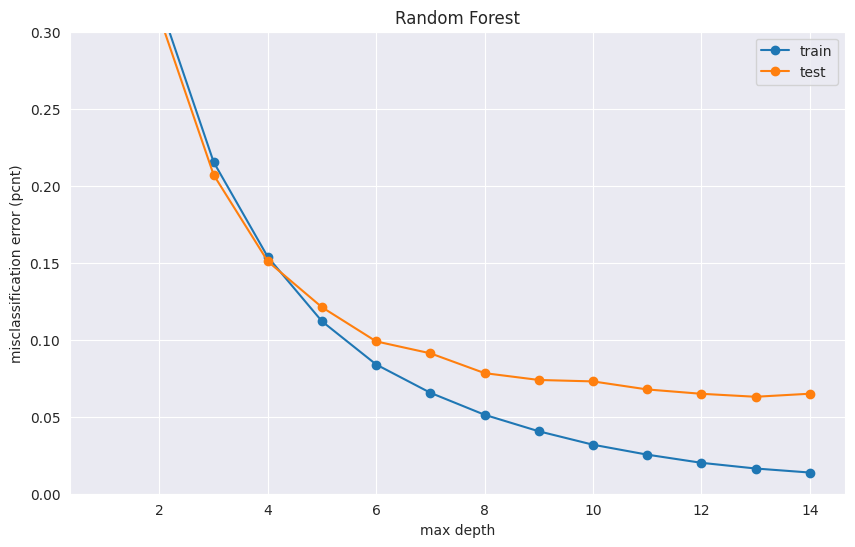

In [129]:
from sklearn.ensemble import RandomForestRegressor

# this should make every run the same
np.random.seed(7)

train_scores = []
test_scores = []
rfs = []

largest_depth = 15

# Build a model from 1 - largest_depth and store it in regrs[depth-1]
for depth in range(1, largest_depth):
  rfs.append(RandomForestRegressor(n_estimators = 120, criterion = 'squared_error', max_depth = depth))
  rfs[depth-1] = rfs[depth-1].fit(x_train, y_train)
  train_scores.append(1 - rfs[depth-1].score(x_train, y_train))
  test_scores.append(1 - rfs[depth-1].score(x_test, y_test))

plt.plot(range(1, largest_depth), train_scores, '-o', label = "train")
plt.plot(range(1, largest_depth), test_scores, '-o', label = "test")
plt.legend(loc = 'best')
plt.xlabel('max depth')
plt.ylabel('misclassification error (pcnt)')
# Setting the range of the Y-axis
plt.ylim(0, 0.3)
plt.title(f"Random Forest")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

In order to precent overfitting

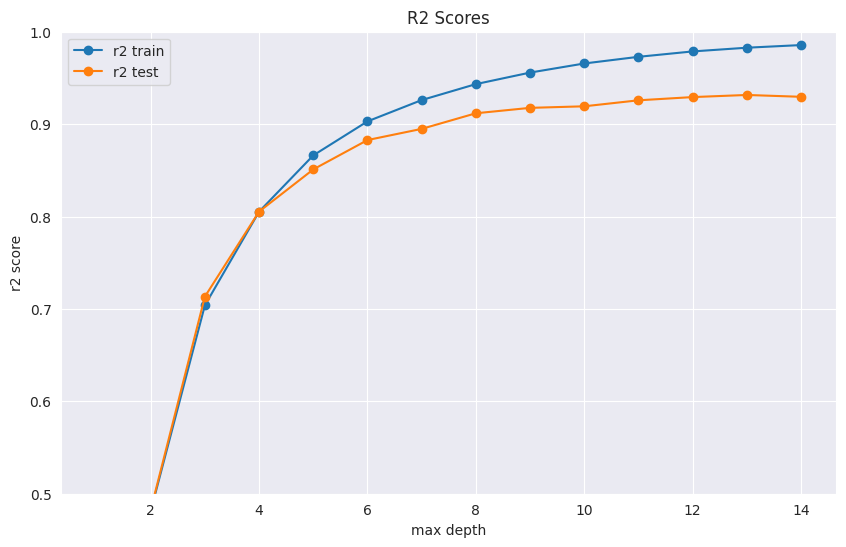

In [130]:
tree_r2_plot(rfs)

Overfitting starts at 5, but gets eggregous above 8. For a combination of all things going to stick with depth of 8 for random forest model.

In [131]:
# choosing this model for random forest
random_forest_model = rfs[7]

**Feature Importance**

In [132]:
model_perf(random_forest_model, x_train, y_train, x_test, y_test)

    Data       MAE      RMSE      MAPE        r2
0  Train  0.153248  0.196626  0.192939  0.943293
1   Test  0.183116  0.250903  0.185532  0.911746


In [133]:
tree_model_importance(random_forest_model ).head(10)

,feature,importance
2,power,0.673891
4,age,0.242622
1,engine,0.025111
5,km_sqrt,0.00704
0,mileage,0.006814
35,make_honda,0.005149
3,seats,0.003964
45,make_mini,0.003698
42,make_mahindra,0.003157
51,make_tata,0.003038


Feature importance is very similar to decision tree.  Power and age take the majority of important with engine as a third then the rest fall off.

## Testing a few more regressors

### Bagging Regressor

In [134]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor()
bagging_model.fit(x_train, y_train)
model_perf(bagging_model, x_train, y_train, x_test, y_test)

    Data       MAE      RMSE      MAPE        r2
0  Train  0.061264  0.095459  0.069994  0.987437
1   Test  0.156226  0.228353  0.251411  0.930841


### ADA Boost

from sklearn.ensemble import AdaBoostRegressor
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(x_train, y_train)


In [135]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(x_train, y_train)
model_perf(adaboost_model, x_train, y_train, x_test, y_test)

    Data       MAE      RMSE      MAPE        r2
0  Train  0.257449  0.325371  0.887499  0.814874
1   Test  0.267803  0.341478  0.749145  0.801436


### Gradient Boost Regressor

In [136]:
from sklearn.ensemble import GradientBoostingRegressor
gradientboost_model = GradientBoostingRegressor()
gradientboost_model.fit(x_train, y_train)
model_perf(gradientboost_model, x_train, y_train, x_test, y_test)

    Data       MAE      RMSE      MAPE        r2
0  Train  0.151806  0.199154  2.646467  0.941987
1   Test  0.156558  0.210461  0.207592  0.938998


### XG Boost

In [137]:
from xgboost import XGBRegressor
xgbs = []
train_scores = []
test_scores = []
largest_depth = 10
for depth in range(1, largest_depth):
  xgbs.append(XGBRegressor(max_depth=depth).fit(x_train, y_train))
  print(f'{depth} depth')
  model_perf(xgbs[depth-1], x_train, y_train, x_test, y_test)

1 depth
    Data       MAE      RMSE      MAPE        r2
0  Train  0.182331  0.245344  0.219153  0.910780
1   Test  0.183407  0.241942  0.214465  0.918168
2 depth
    Data       MAE      RMSE      MAPE        r2
0  Train  0.148882  0.196305  0.274529  0.945266
1   Test  0.152126  0.205007  0.167195  0.944062
3 depth
    Data       MAE      RMSE      MAPE        r2
0  Train  0.124839  0.163762  0.186207  0.962697
1   Test  0.140363  0.189658  0.163170  0.952752
4 depth
    Data       MAE      RMSE      MAPE        r2
0  Train  0.102041  0.134040  0.114000  0.975277
1   Test  0.129126  0.181344  0.133475  0.957460
5 depth
    Data       MAE      RMSE      MAPE        r2
0  Train  0.082690  0.109587  0.101550  0.983633
1   Test  0.128465  0.187980  0.124402  0.953929
6 depth
    Data       MAE      RMSE      MAPE        r2
0  Train  0.064027  0.085217  0.056945  0.990172
1   Test  0.132838  0.199173  0.144037  0.947999
7 depth
    Data       MAE      RMSE      MAPE        r2
0  Train  0.0

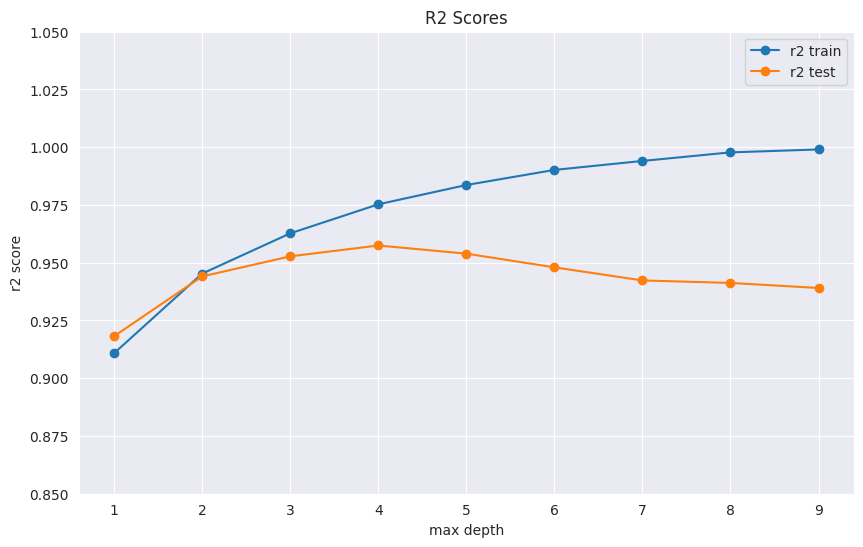

In [138]:
def xgbs_r2_plot(models_array, name=None):
  r2_train_scores =[]
  r2_test_scores = []

  largest_depth = len(models_array) + 1

  for depth in range(1, largest_depth):
    (_, _, _, _, _, _, r2_train, r2_test) = model_stats(models_array[depth-1], x_train, y_train, x_test, y_test)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)

  plt.plot(range(1, largest_depth), r2_train_scores, '-o', label = "r2 train")
  plt.plot(range(1, largest_depth), r2_test_scores, '-o', label = "r2 test")
  plt.legend(loc = 'best')
  plt.xlabel('max depth')
  plt.ylabel('r2 score')
  # Setting the range of the Y-axis
  plt.ylim(0.85, 1.05)
  plt.title(f"R2 Scores")
  fig = plt.gcf()
  fig.set_size_inches(10, 6)
  if(name != None):
    name = 'xgb_r2_scores'
  plt.savefig(f'/content/drive/MyDrive/mit-pe/capstone/{name}.png')
  plt.show()

xgbs_r2_plot(xgbs, 'xgbs')

A depth of 4 is the best testing r2 and good scores for errors

In [139]:
xgb_regressor = xgbs[3]
model_perf(xgb_regressor, x_train, y_train, x_test, y_test)

    Data       MAE      RMSE      MAPE        r2
0  Train  0.102041  0.134040  0.114000  0.975277
1   Test  0.129126  0.181344  0.133475  0.957460


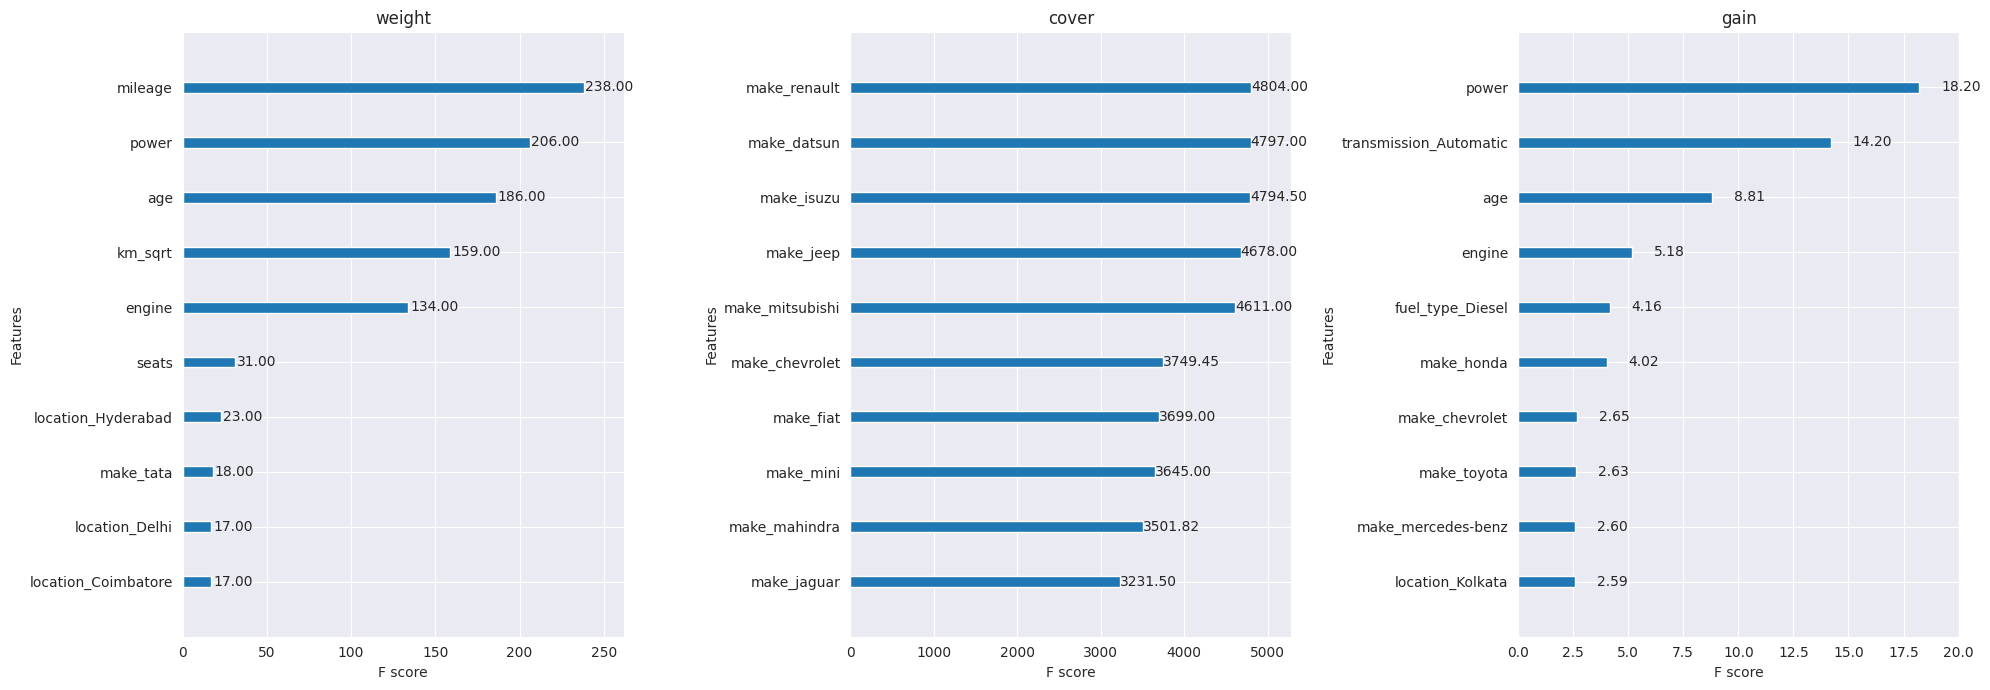

In [140]:
import xgboost as xgb
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
for idx, t in enumerate(['weight','cover', 'gain']):
  xgb.plot_importance(xgb_regressor, ax=ax[idx], importance_type=t, title=t, values_format="{v:.2f}", max_num_features=10)

plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/mit-pe/capstone/xgb_importance.png')
plt.show()

In [141]:
print(xgb_regressor.get_booster().get_dump()[0])

0:[power<136] yes=1,no=2,missing=2
	1:[age<9] yes=3,no=4,missing=4
		3:[power<88] yes=7,no=8,missing=8
			7:[power<70] yes=15,no=16,missing=16
				15:leaf=-0.193799734
				16:leaf=-0.0778704882
			8:[age<5] yes=17,no=18,missing=18
				17:leaf=0.107363828
				18:leaf=-0.00851084478
		4:[power<100.599998] yes=9,no=10,missing=10
			9:[age<13] yes=19,no=20,missing=20
				19:leaf=-0.291245431
				20:leaf=-0.456009984
			10:[engine<2143] yes=21,no=22,missing=22
				21:leaf=-0.192160264
				22:leaf=-0.0387782007
	2:[age<8] yes=5,no=6,missing=6
		5:[power<165] yes=11,no=12,missing=12
			11:[age<5] yes=23,no=24,missing=24
				23:leaf=0.312562406
				24:leaf=0.171288148
			12:[power<218] yes=25,no=26,missing=26
				25:leaf=0.408768237
				26:leaf=0.599036455
		6:[power<165] yes=13,no=14,missing=14
			13:[age<11] yes=27,no=28,missing=28
				27:leaf=0.0539297946
				28:leaf=-0.115997978
			14:[power<241.399994] yes=29,no=30,missing=30
				29:leaf=0.187459618
				30:leaf=0.404726088



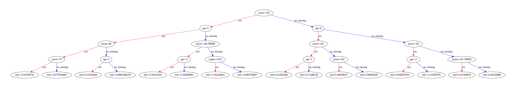

In [142]:
xgb.plot_tree(xgb_regressor)
plt.savefig(f'/content/drive/MyDrive/mit-pe/capstone/xgb_regressor_tree.png')
plt.show()

XGBoost, as expected, performs very well. Power and age are still very important, but it also blends in features from the linear regression, including transmission and fuel type. The very high R2 on training data is initially cause for concern of overfitting, however, the test data is still ~95% accuracy.

Even though KM's driven seems to have a high feature importance, looking at the graph I do no see it being used.

## **Conclusions and Recommendations**

In [143]:
print('\tLinear Regression')
model_perf(lin_regr_model, x_train_scaled, y_train, x_test_scaled, y_test)
print()
print('\tRidge Model')
model_perf(ridge_model_scaled0, x_train_scaled, y_train, x_test_scaled, y_test)
print()
print('\tDecision Tree')
model_perf(decision_tree_model, x_train, y_train, x_test, y_test)
print()
print('\tBagging Regressor')
model_perf(bagging_model, x_train, y_train, x_test, y_test)
print()
print('\tRandom Forest')
model_perf(random_forest_model, x_train, y_train, x_test, y_test)
print()
print('\tADA Boost')
model_perf(adaboost_model, x_train, y_train, x_test, y_test)
print()
print('\tGradient Boost')
model_perf(gradientboost_model, x_train, y_train, x_test, y_test)
print()
print('\tXG Boost (max_depth=4)')
model_perf(xgb_regressor, x_train, y_train, x_test, y_test)

	Linear Regression
    Data       MAE      RMSE      MAPE        r2
0  Train  0.191990  0.251185  0.251220  0.908725
1   Test  0.188317  0.250237  0.210302  0.913042

	Ridge Model
    Data       MAE      RMSE      MAPE        r2
0  Train  0.192561  0.251641  0.204278  0.907254
1   Test  0.189273  0.251052  0.255721  0.911556

	Decision Tree
    Data       MAE      RMSE      MAPE        r2
0  Train  0.214427  0.278857  0.304719  0.885068
1   Test  0.234246  0.318629  0.308425  0.854276

	Bagging Regressor
    Data       MAE      RMSE      MAPE        r2
0  Train  0.061264  0.095459  0.069994  0.987437
1   Test  0.156226  0.228353  0.251411  0.930841

	Random Forest
    Data       MAE      RMSE      MAPE        r2
0  Train  0.153248  0.196626  0.192939  0.943293
1   Test  0.183116  0.250903  0.185532  0.911746

	ADA Boost
    Data       MAE      RMSE      MAPE        r2
0  Train  0.257449  0.325371  0.887499  0.814874
1   Test  0.267803  0.341478  0.749145  0.801436

	Gradient Boost
    

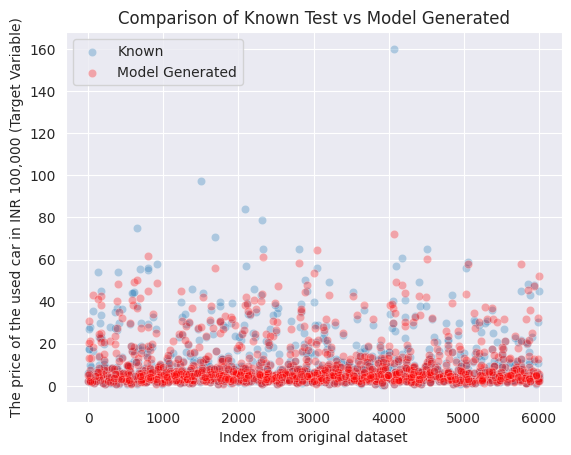

In [144]:
y_predict = pd.Series(data=xgb_regressor.predict(x_test),index=y_test.index, name=y_test.name)
sns.scatterplot(np.exp(y_test), label="Known", alpha=0.3);
sns.scatterplot(np.exp(y_predict), color='red', label='Model Generated', alpha=0.3);
plt.title('Comparison of Known Test vs Model Generated')
plt.legend(loc=0)
plt.xlabel('Index from original dataset')
plt.ylabel(feature_lookup['price'])
plt.show()

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

All models are performing well. However XG Boost has done quite a bit better comparitively.

All models places a heavy importance on age and power/engine. It easy to understand why this would be important to the resale price.

####Linear Regression vs the Decision Tree/Random Forest
The more basic tree models essentially focused on age and power/engine, while linear regression placed additional importance into encorporating make, transmission and fuel_type.

Linear regression also placed some importance on having multiple owners (four or more) but there wasnt enough data to support it. Logically, cars that hold value will continue to hold value, and holding value means it is resellable. It's somewhat chicken and egg and I think is a short fall of the linear regression model focusing too much on this small amount of data.

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

Age and engine/power are the important metrics for resale price. Make, transmission and fuel type.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

XG Boost is one of the more modern models run, and thus has many improvements from years of research work. It shows how well it is work because it encorporates many of the things you would expect it to, including age, power, engine but also tranmission, fuel type and make. It doesn't seem to have the same short falls as linear regression by focusing on some things that are weaker in prediction (see fourth owner and more).

# Executive Summary of Findings and Recommendations

## Important Findings

The cars that hold a higher resale value are those with higher power, and correlated larger engines, the age of the vehicle and having an automatic transmission. Fuel type being diesel to a has importance.

I found this result by analyzing trends between different models and confirming with the XG Boost model.

## Missing Data

There is a possibility that original sale price of the vehicle will play a large factor, but the data set was not complete enough use that. The market more than likely adjusts for that, and it would be co-linear with other features.

## Proposed Model

Utilize the XG Boost model, tuned to a max depth of 4 nodes.

*Max depth tuning is a balance of minimizing over-fitting and maximizing accuracy of prediction on the test data($R^2$)*

- Power - More is better. Power appears to be valuable for resale.
- Age - Less is better. Newer vehicles hold resale value.
- KM Driven - Less is better.

These insights aren’t particularly revolutionary. However, there is some smaller insights that might give our company the edge.

- Location - Hyderabad then Delhi. These are the two highest weighted locations.
- Transmission - Automatic. These vehicles are reselling are a much higher rate.
- Diesel Fuel - Resell at a higher rate.

# Problem Summary

Find the features to focus on for the highest resale value vehicles. As a startup, we should to find the niches with the highest resale value.

# Recommendations for Solution

Act as a coordinator for the highest resale vehicles, meaning our cut of the sale price would be higher.

To avoid the obvious of Power/engine, age, and km driven, we focus on a smaller market. Automatic and Diesel vehicles located at Hyderabad and Delhi. Then we can drill down into the power/engine, age and km driven of those specific vehicles. This will give us a focus and limited market, so we stay as lean as possible during the startup.

# Recommendations for Implementation

Focus on the market above, and use the model to price according plus a small % to cover a commission.


## Benefit

Our marketing can be focused on specific cities, tailored. Gain reputation of reselling more valuable cars, meaning more sellers will want us to list their vehicles. We can eventually use this higher resale value to advertise.

## Risk

There is risk the market is too small. That it may not be large enough to break in. There is also risk that the focus on diesel vehicles may just be short term due to pricing of the fuel.

## Further Analysis

As we can collect more data, we need to analyze new prices vs sale prices and first-time resale price vs follow on resale price to see how vehicles trend with further resale.


In [145]:
!jupyter nbconvert '/content/drive/MyDrive/mit-pe/capstone/julian_used_cars_capstone_machine_learning.ipynb' --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/mit-pe/capstone/julian_used_cars_capstone_machine_learning.ipynb to html
[NbConvertApp] Writing 4378700 bytes to /content/drive/MyDrive/mit-pe/capstone/julian_used_cars_capstone_machine_learning.html
